In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
palette = sns.color_palette('Set3')

In [41]:
df = pd.read_csv('./final_df.csv')
df['count'] = 1

In [42]:
def age(x):
    if x <= 18:
        result = "청소년"
    elif x <= 29:
        result = "청년"
    elif x<= 49:
        result = "중년"
    elif x<= 64:
        result = "장년"
    else:
        result = "노년"
    return result

df['new_연령'] = df["연령"].apply(lambda x: age(x))

In [43]:
df.head()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,최근입원기간,누적입원기간,count,new_연령
0,10.5,2,44.0,0.0,0,0,0,0,0,0,...,0,NaN,2155.3,4,Middle,0,1,30,1,중년
1,46.7,3,21.0,1.0,0,0,0,0,0,0,...,0,NaN,2143.1,4,Middle,0,3,30,1,청년
2,30.1,3,13.0,0.0,0,0,0,0,0,0,...,0,NaN,1868.7,4,Down,0,0,30,1,청년
3,45.4,3,0.0,0.0,0,0,0,0,0,0,...,0,NaN,1851.2,5,Middle,0,3,30,1,청년
4,52.2,1,31.0,0.0,1,0,1,0,0,0,...,0,NaN,2419.1,2,Up,0,1,60,1,장년


In [44]:
def ttest(df1, df2, rihgt = True):
    t_result = stats.ttest_ind(df1,df2, equal_var = rihgt)
    t,p = t_result.statistic, t_result.pvalue
    print("2-Sample t-test")
    print("t:{}".format(t))
    print("p:{}".format(p))

In [45]:
def chi2(df):
    chi, pval, dof, expected = stats.chi2_contingency(df)
    
    print('chi-sqauare test')
    print(f'chisq : {chi}')
    print(f'p : {pval}')

## 재발여부

### 고혈압 X 재발여부

In [46]:
df['고혈압여부'].value_counts()

0    1503
1     233
Name: 고혈압여부, dtype: int64

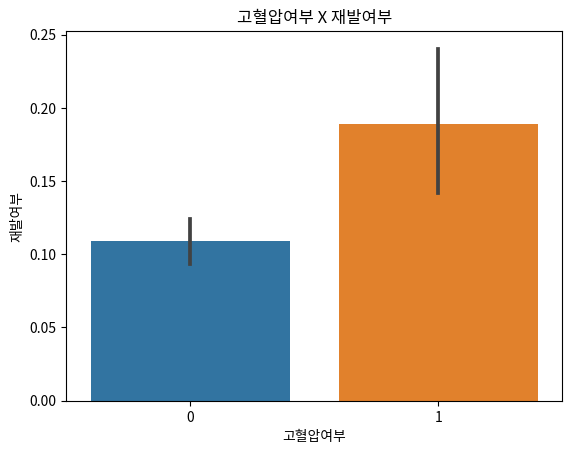

In [47]:
# 고혈압여부 X  재발여부
sns.barplot(data = df , x = '고혈압여부', y = '재발여부')
plt.title('고혈압여부 X 재발여부');

In [48]:
new_df = df.pivot_table(index = '고혈압여부', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)

$H_0 :$ 고혈압 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 고혈압 여부에 따라 재발여부에 차이가 있다.


In [49]:
def chi2(df):
    chi, pval, dof, expected = stats.chi2_contingency(df)
    
    print('chi-sqauare test')
    print(f'chisq : {chi : 0.3f}')
    print(f'p : {pval : 0.3f}')

In [50]:
chi2(new_df)

chi-sqauare test
chisq :  11.414
p :  0.001


In [51]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)

print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')
# 수술전 고혈합 환자를 위한 care 활동 만들자!

chi-sqauare test
chisq :  11.414
p :  0.001


In [52]:
df.columns

Index(['Large Lymphocyte', 'Location of herniation', 'ODI', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '종양진행여부', '직업', '체중',
       '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부',
       '재발여부', '헤모글로빈수치', '환자통증정도', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증', '최근입원기간', '누적입원기간', 'count', 'new_연령'],
      dtype='object')

In [53]:
df_true = df[df['고혈압여부'] == 1]

In [54]:
### 림프종
# H0 : large lymphocyte 림프종 차이 없다.
# H1 : large lymphocyte 림프종 차이 있다.
df1 = df_true[df_true['재발여부'] == 1]['Large Lymphocyte']
df2 = df_true[df_true['재발여부'] == 0]['Large Lymphocyte']

ttest(df1, df2)
# 차이 없다!

2-Sample t-test
t:-1.7374317908988124
p:0.08364379854726138


In [55]:
### Location of Herniation
# chi2
pivot_df = pd.pivot_table(df_true, index = 'Location of herniation', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  3.264
p :  0.515


In [56]:
### 가족력
# chi2
pivot_df = pd.pivot_table(df_true, index = '가족력', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  0.000
p :  1.000


In [57]:
df['간질성폐질환'].value_counts()

0    1700
1      36
Name: 간질성폐질환, dtype: int64

In [58]:
### 간질성폐질환
pivot_df = pd.pivot_table(df_true, index = '간질성폐질환', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  nan
p :  nan


In [59]:
### 당뇨여부
pivot_df = pd.pivot_table(df_true, index = '당뇨여부', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  4.821
p :  0.028


In [60]:
### 성별
pivot_df = pd.pivot_table(df_true, index = '성별', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  5.750
p :  0.016


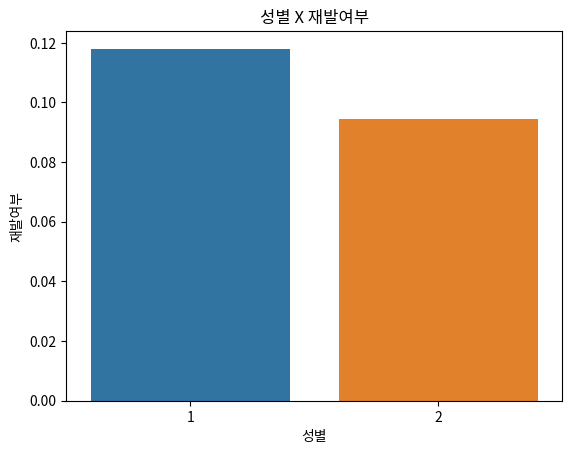

In [61]:
sns.barplot(data = df[df['고혈압여부'] != 1] , x = '성별', y = '재발여부', errorbar=('ci', False))
plt.title('성별 X 재발여부');

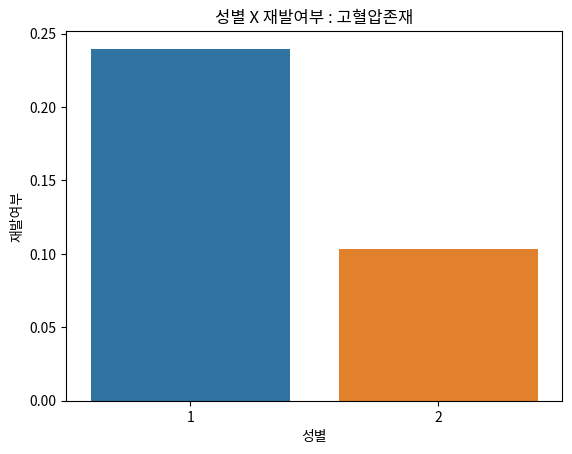

In [62]:
sns.barplot(data = df_true , x = '성별', y = '재발여부', errorbar=('ci', False))
plt.title('성별 X 재발여부 : 고혈압존재');

In [63]:
df_true.columns

Index(['Large Lymphocyte', 'Location of herniation', 'ODI', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '종양진행여부', '직업', '체중',
       '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부',
       '재발여부', '헤모글로빈수치', '환자통증정도', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증', '최근입원기간', '누적입원기간', 'count', 'new_연령'],
      dtype='object')

In [64]:
### 신장
# H0 : large lymphocyte 림프종 차이 없다.
# H1 : large lymphocyte 림프종 차이 있다.
df1 = df_true[df_true['재발여부'] == 1]['신장']
df2 = df_true[df_true['재발여부'] == 0]['신장']

ttest(df1, df2)
# 차이 있다..?

2-Sample t-test
t:3.154422856700353
p:0.001821695850960081


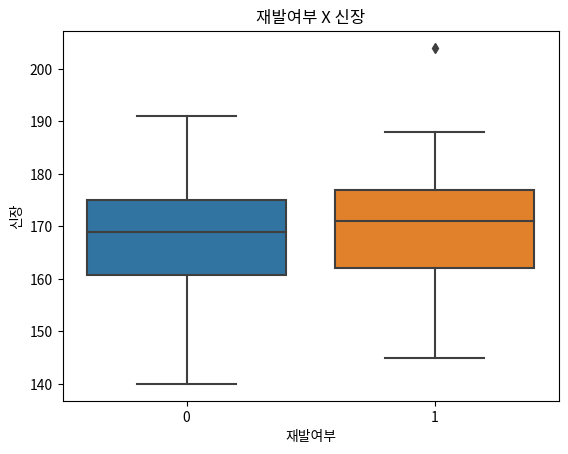

In [65]:
sns.boxplot(data = df , x = '재발여부', y = '신장',)
plt.title('재발여부 X 신장');

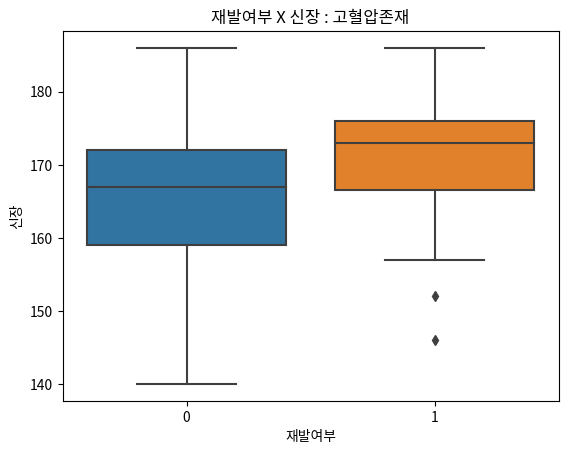

In [66]:
sns.boxplot(data = df_true , x = '재발여부', y = '신장',)
plt.title('재발여부 X 신장 : 고혈압존재');

In [67]:
df['New_신장'] = df['신장'] / 100

In [68]:

df_true['New_신장'] = df_true['신장'] / 100

/tmp/ipykernel_31754/3549656211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['New_신장'] = df_true['신장'] / 100


In [69]:
df.columns

Index(['Large Lymphocyte', 'Location of herniation', 'ODI', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '종양진행여부', '직업', '체중',
       '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부',
       '재발여부', '헤모글로빈수치', '환자통증정도', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증', '최근입원기간', '누적입원기간', 'count', 'new_연령', 'New_신장'],
      dtype='object')

In [70]:
df['BMI'] = df['체중'] / (df['New_신장'] ** 2)

In [71]:

df_true['BMI'] = df_true['체중'] / (df_true['New_신장'] **2)

/tmp/ipykernel_31754/2148581347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['BMI'] = df_true['체중'] / (df_true['New_신장'] **2)


In [72]:
df.columns

Index(['Large Lymphocyte', 'Location of herniation', 'ODI', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '종양진행여부', '직업', '체중',
       '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자', '수술기법', '수술시간', '수술실패여부',
       '재발여부', '헤모글로빈수치', '환자통증정도', '수술일자', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증', '최근입원기간', '누적입원기간', 'count', 'new_연령', 'New_신장', 'BMI'],
      dtype='object')

<Axes: xlabel='재발여부', ylabel='체중'>

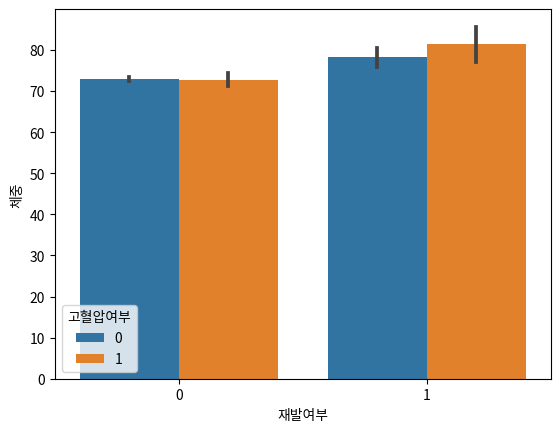

In [73]:
sns.barplot(data = df[(df['성별'] == 1)], x = '재발여부' , y ='체중', hue = '고혈압여부')

In [74]:
df_1 = df[(df['성별'] == 1) & (df['고혈압여부'] == 1) & (df['재발여부'] == 1)]['체중']
df_2 = df[(df['성별'] == 1) & (df['고혈압여부'] != 1) & (df['재발여부'] == 1)]['체중']

ttest(df_1, df_2)

2-Sample t-test
t:1.3798255678476328
p:0.16979398608931526


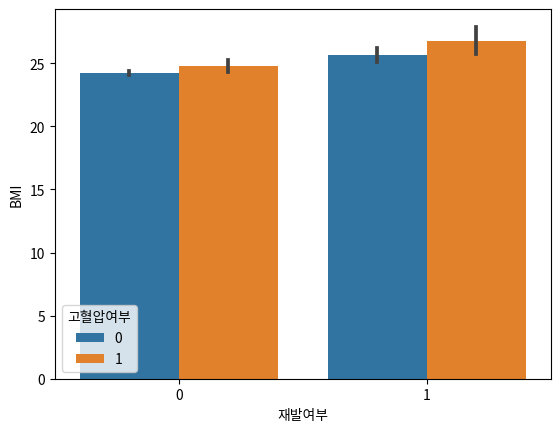

In [75]:
sns.barplot(data = df[(df['성별'] == 1)], x = '재발여부' , y ='BMI', hue = '고혈압여부');

In [76]:
df_1 = df[(df['성별'] == 1) & (df['고혈압여부'] == 1) & (df['재발여부'] == 1)]['BMI']
df_2 = df[(df['성별'] == 1) & (df['고혈압여부'] != 1) & (df['재발여부'] == 1)]['BMI']

ttest(df_1, df_2)

2-Sample t-test
t:1.9211079345382556
p:0.05670786977367463


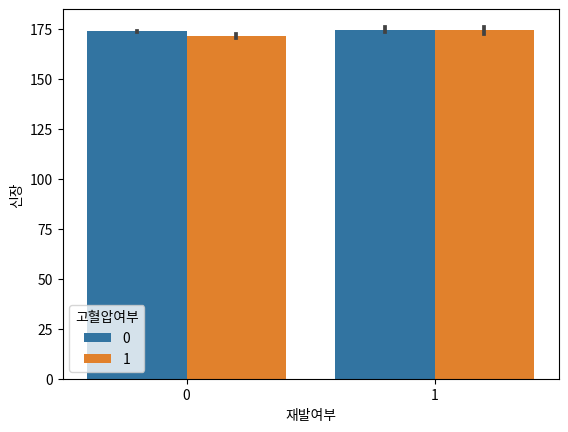

In [77]:
sns.barplot(data = df[(df['성별'] == 1)], x = '재발여부' , y ='신장', hue = '고혈압여부');

In [78]:
df_1 = df[(df['성별'] == 1) & (df['고혈압여부'] == 1) & (df['재발여부'] == 1)]['신장']
df_2 = df[(df['성별'] == 1) & (df['고혈압여부'] != 1) & (df['재발여부'] == 1)]['신장']

ttest(df_1, df_2)

2-Sample t-test
t:-0.23063524315474293
p:0.8179278171211521


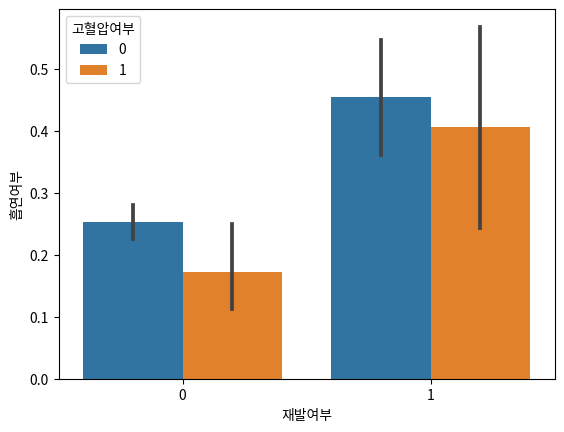

In [300]:
sns.barplot(data = df[(df['성별'] == 1)], x = '재발여부' , y ='흡연여부', hue = '고혈압여부');

In [301]:
new_new_df = df[(df['성별'] == 1)]
# 고혈압 여부에 따라 확인해야함

In [302]:
new_new_df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,NaN,2155.30,4,Middle,0,1,중년,1.74,24.772097
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,NaN,2143.10,4,Middle,0,1,청년,1.72,23.661439
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,NaN,1868.70,4,Down,0,1,청년,1.77,21.705129
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,NaN,1851.20,5,Middle,0,1,청년,1.72,23.661439
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,NaN,2419.10,2,Up,0,1,장년,1.66,27.943098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,800PT,33.3,2,NaN,0.0,0,0,0,0,0,...,0,-1.74,2111.00,4,Extremely up,0,1,중년,1.79,20.910708
1886,866PT,56.8,2,NaN,0.0,0,0,1,0,0,...,0,-2.31,1924.23,4,Middle,1,1,중년,1.70,22.491349
1887,136PT,36.1,3,42.0,0.0,0,0,1,0,0,...,0,-0.67,2375.60,4,Middle,0,1,중년,1.82,24.121483
1892,891PT,45.8,4,NaN,0.0,0,0,0,0,0,...,0,-1.93,2203.83,4,Middle,0,1,중년,1.82,16.906171


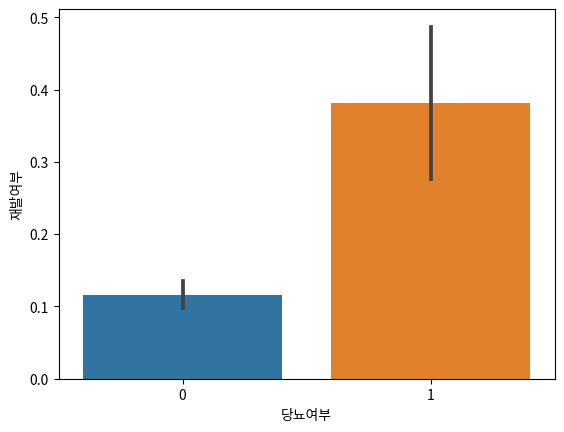

In [303]:
sns.barplot(data = new_new_df , x = '당뇨여부' , y = '재발여부' );

In [304]:
### 스테로이드치료
df['스테로이드치료'].value_counts()

1    1134
0     760
Name: 스테로이드치료, dtype: int64

In [305]:
pivot_df = pd.pivot_table(df_true, index = '직업', columns = '스테로이드치료', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  20.748
p :  0.145


In [306]:
### 체중
df1 = df_true[df_true['재발여부'] == 1]['체중']
df2 = df_true[df_true['재발여부'] == 0]['체중']

ttest(df1, df2)
# 차이 있다..?

2-Sample t-test
t:5.26498009551081
p:3.0566272961079175e-07


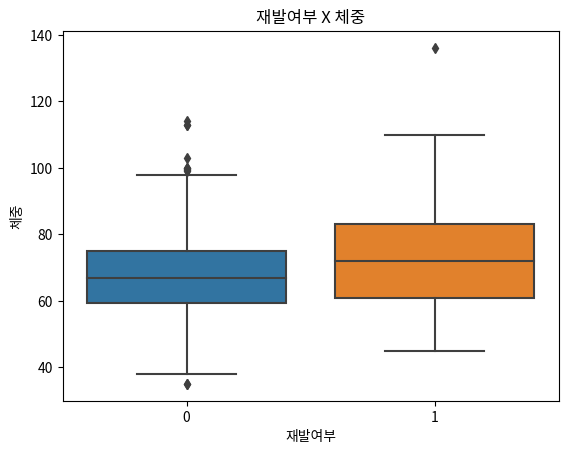

In [307]:
sns.boxplot(data = df , x = '재발여부', y = '체중',)
plt.title('재발여부 X 체중');

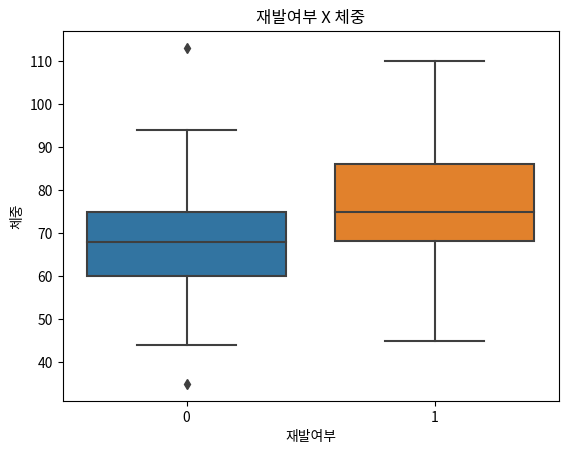

In [308]:
sns.boxplot(data = df_true , x = '재발여부', y = '체중',)
plt.title('재발여부 X 체중');

In [309]:
### 연령
pivot_df = pd.pivot_table(df_true, index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)
# 관련없다!

chi-sqauare test
chisq :  1.947
p :  0.746


In [310]:
### 우울증
pivot_df = pd.pivot_table(df_true, index = '우울증여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  0.425
p :  0.515


In [311]:
### 우울증
pivot_df = pd.pivot_table(df_true, index = '직업', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  13.806
p :  0.540


In [312]:
df_true['직업'].value_counts()

사무직      52
무직       44
자영업      25
주부       14
사업가       8
군인        6
농업        6
운수업       5
학생        4
노동직       4
특수전문직     4
공무원       4
교사        3
건설업       2
의료직       2
예술가       1
Name: 직업, dtype: int64

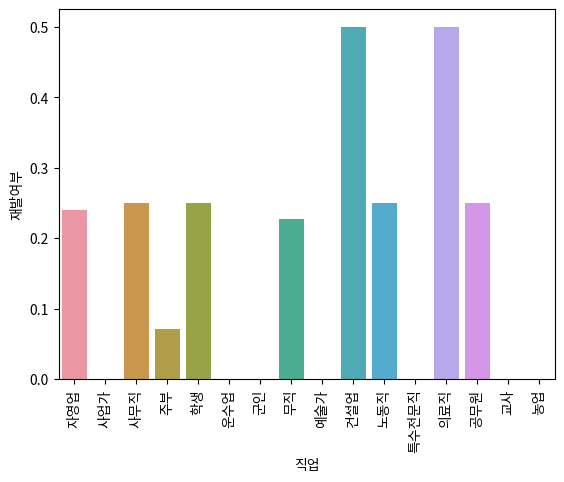

In [313]:
sns.barplot(data = df_true, x = '직업', y = '재발여부', errorbar=('ci', False));
plt.xticks(rotation = 90);
# 표본이 너무 없다,,,,
# 묶을 수 있는 방법이 필요!

In [314]:
### 헤모글로빈수치
df1 = df_true[df_true['재발여부'] == 1]['헤모글로빈수치']
df2 = df_true[df_true['재발여부'] == 0]['헤모글로빈수치']

ttest(df1, df2)

2-Sample t-test
t:0.39525138429636963
p:0.6929998933640613


In [315]:
pivot_df = pd.pivot_table(df[df['환자통증정도'] != 1], index = '환자통증정도', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
pivot_df

재발여부,0,1
환자통증정도,,
2,115.0,15.0
3,38.0,6.0
4,8.0,0.0
5,38.0,8.0
6,37.0,3.0
7,779.0,106.0
8,364.0,46.0
9,140.0,32.0
10,102.0,5.0


In [316]:
### 환자통증정도
pivot_df = pd.pivot_table(df_true, index = '환자통증정도', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
pivot_df

재발여부,0,1
환자통증정도,,
1,2.0,1.0
2,11.0,2.0
3,5.0,1.0
4,2.0,0.0
5,3.0,2.0
6,1.0,0.0
7,99.0,19.0
8,49.0,11.0
9,14.0,9.0


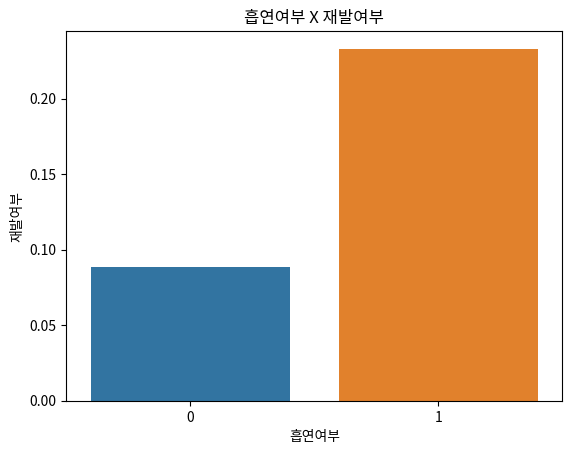

In [317]:
sns.barplot(data = df[df['환자통증정도'] != 1], x = '흡연여부', y = '재발여부',errorbar=('ci', False))
plt.title('흡연여부 X 재발여부');

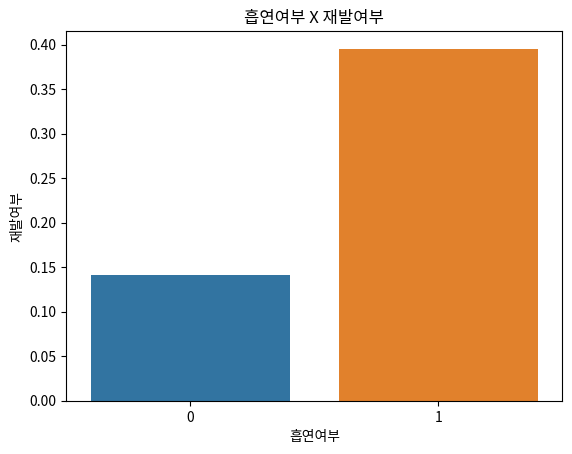

In [318]:
sns.barplot(data = df_true, x = '흡연여부', y = '재발여부',errorbar=('ci', False))
plt.title('흡연여부 X 재발여부');

In [319]:
### 흡연여부
pivot_df = pd.pivot_table(df_true, index = '흡연여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
pivot_df

재발여부,0,1
흡연여부,,
0,176,29
1,26,17


In [320]:
chi2(pivot_df)

chi-sqauare test
chisq :  13.531
p :  0.000


In [321]:
df.수술기법

0       TELD
1       TELD
2       TELD
3       IELD
4       TELD
        ... 
1889    TELD
1890    TELD
1891    TELD
1892    TELD
1893     NaN
Name: 수술기법, Length: 1894, dtype: object

In [322]:
### 수술기법
pivot_df = pd.pivot_table(df_true, index = '수술기법', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  2.575
p :  0.109


In [323]:
df_true[df_true['재발여부'] == 1]['수술시간']

34       58.0
62       92.0
164      42.0
191      84.0
212      84.0
381      55.0
409      60.0
420      75.0
446      30.0
506      63.0
509      66.0
553      70.0
566      90.0
569      89.0
570      48.0
601      94.0
665      47.0
708      70.0
770      50.0
809      75.0
849      55.0
855      57.0
864     141.0
967      57.0
1001     50.0
1106      NaN
1114     45.0
1121    145.0
1172     68.0
1447     40.0
1492     60.0
1517     70.0
1532     50.0
1538    120.0
1554    125.0
1593     65.0
1610     30.0
1641     50.0
1661     60.0
1667     60.0
1688     45.0
1692     55.0
1768     49.0
1771    103.0
1822     97.0
1852     90.0
Name: 수술시간, dtype: float64

In [324]:
df_true[df_true['재발여부'] == 0]['수술시간']

33      86.0
43      39.0
47      75.0
58      51.0
75      79.0
        ... 
1836    80.0
1870    72.0
1876    41.0
1888    80.0
1891    76.0
Name: 수술시간, Length: 202, dtype: float64

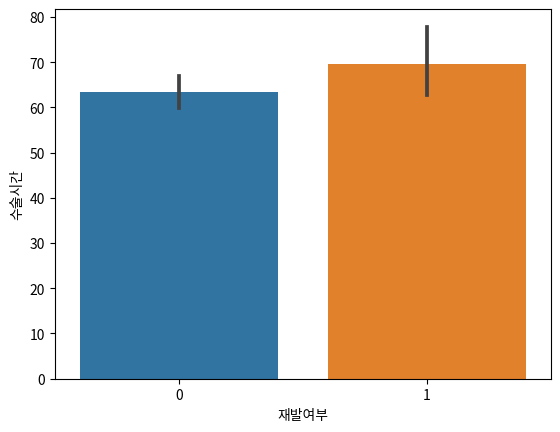

In [325]:
sns.barplot(data = df_true , x = '재발여부', y = '수술시간');

In [326]:
### 수술시간
df_1 = df_true[df_true['재발여부'] == 1]['수술시간'].fillna(df_true['수술시간'].mean())
df_2 = df_true[df_true['재발여부'] == 0]['수술시간'].fillna(df_true['수술시간'].mean())

ttest(df_1, df_2)

2-Sample t-test
t:1.4377813944178688
p:0.15176692539867534


In [327]:
df_true.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI'],
      dtype='object')

In [328]:
### 전방디스크높이
df_1 = df_true[df_true['재발여부'] == 1]['전방디스크높이(mm)']
df_2 = df_true[df_true['재발여부'] == 0]['전방디스크높이(mm)']

ttest(df_1, df_2)

2-Sample t-test
t:-0.2095644676997035
p:0.8341810600350512


In [329]:
### 전방디스크높이
df_1 = df_true[df_true['재발여부'] == 1]['후방디스크높이(mm)']
df_2 = df_true[df_true['재발여부'] == 0]['후방디스크높이(mm)']

ttest(df_1, df_2)

2-Sample t-test
t:-1.1443309841170024
p:0.2535986118340899


In [330]:
### 지방축적도
df_1 = df_true[df_true['재발여부'] == 1]['후방디스크높이(mm)'].dropna()
df_2 = df_true[df_true['재발여부'] == 0]['후방디스크높이(mm)'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-1.1443309841170024
p:0.2535986118340899


In [331]:
### MF + MS
df_2 = df_true[df_true['재발여부'] == 0]['MF + ES'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['MF + ES'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:0.6124447971456622
p:0.5408092121184052


In [332]:
### Modic Change
df_2 = df_true[df_true['재발여부'] == 0]['Modic change'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['Modic change'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-0.013156976907636151
p:0.9895132180388571


In [333]:
df_true

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI
33,482PT,53.2,3,39.0,0.0,0,1,0,0,0,...,1,-1.54,2119.30,4,Middle,0,1,노년,1.56,23.791913
34,511PT,42.7,5,NaN,0.0,0,1,0,0,0,...,0,-1.76,2040.70,4,Middle,0,1,중년,1.74,24.540890
43,192PT,29.5,3,NaN,0.0,0,1,1,0,0,...,0,-1.88,2385.25,4,Middle,0,1,중년,1.65,24.646465
47,628PT,36.8,2,NaN,0.0,0,1,0,0,0,...,0,-1.87,2680.00,4,Middle,0,1,중년,1.71,21.545091
58,23PT,59.2,3,30.0,0.0,0,1,0,0,0,...,0,-1.59,1744.30,4,Down,0,1,노년,1.54,24.118738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,365PT,43.7,1,NaN,0.0,0,1,0,0,0,...,0,-1.70,1942.75,4,Middle,0,1,장년,1.75,24.359184
1870,314PT,51.4,3,NaN,0.0,0,1,1,0,0,...,0,-1.22,2587.80,4,Middle,0,1,청년,1.70,24.636678
1876,379PT,27.6,1,NaN,0.0,0,1,0,0,0,...,0,-1.66,1694.53,4,Down,0,1,장년,1.72,24.607896
1888,549PT,46.8,1,29.0,0.0,0,1,0,0,0,...,0,-1.88,1915.40,4,Middle,0,1,중년,1.52,24.454640


In [334]:
df_true = df_true[df_true['PI'] <= 300]

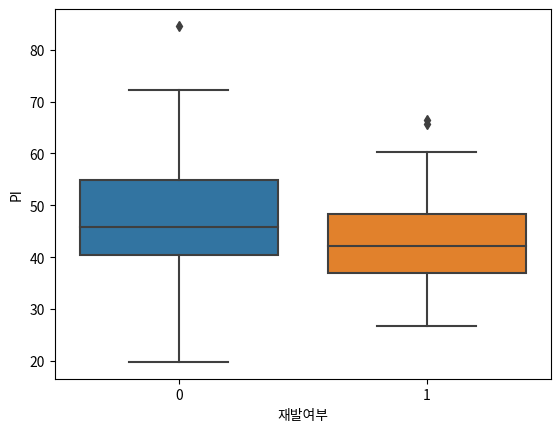

In [335]:
sns.boxplot(data = df_true, x = '재발여부', y = 'PI');

In [336]:
### PI
df_2 = df_true[df_true['재발여부'] == 0]['PI'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['PI'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-1.9395606573810764
p:0.053585716460954363


In [337]:
### PT
df_2 = df_true[df_true['재발여부'] == 0]['PT'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['PT'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-0.9628562900735265
p:0.3365728929627262


In [338]:
### segangle
df_2 = df_true[df_true['재발여부'] == 0]['Seg Angle(raw)'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['Seg Angle(raw)'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:0.3453456932471876
p:0.7301320306744756


In [339]:
### vaccum disc
pivot_df = pd.pivot_table(df_true, index = 'Vaccum disc', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  0.147
p :  0.701


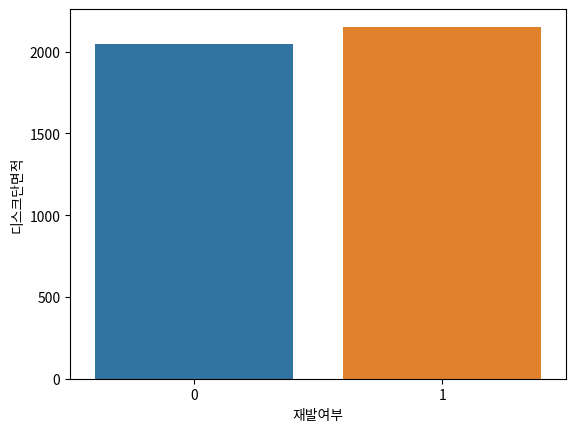

In [340]:
sns.barplot(data = df_true, x = '재발여부', y = '디스크단면적', errorbar = ('ci', False));

In [341]:
### 디스크 단면적
df_2 = df_true[df_true['재발여부'] == 0]['디스크단면적'].dropna()
df_1 = df_true[df_true['재발여부'] == 1]['디스크단면적'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:2.0191987211858726
p:0.044560173335923776


In [342]:
df_true.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI'],
      dtype='object')

In [343]:
### 디스크 위치
pivot_df = pd.pivot_table(df_true, index = '디스크위치', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  3.880
p :  0.693


In [344]:
### 척추이동척도
pivot_df = pd.pivot_table(df_true, index = '척추이동척도', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  3.876
p :  0.423


In [345]:
pivot_df

재발여부,0,1
척추이동척도,,
Down,56.0,9.0
Extremely down,4.0,2.0
Extremely up,5.0,0.0
Middle,133.0,31.0
Up,4.0,2.0


In [346]:
### 척추이동척도
pivot_df = pd.pivot_table(df_true, index = '척추전방위증', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  0.016
p :  0.899


In [347]:
df['스테로이드치료'].value_counts()

1    1134
0     760
Name: 스테로이드치료, dtype: int64

In [348]:
st_df = df[df['스테로이드치료'] == 1]

In [349]:
st_df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,NaN,2143.10,4,Middle,0,1,청년,1.72,23.661439
6,1259PT,57.0,3,NaN,0.0,0,0,1,0,0,...,0,NaN,2379.42,4,Middle,0,1,장년,1.55,22.476587
7,963PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,NaN,1753.10,5,Up,0,1,장년,1.58,18.426534
12,1517PT,59.4,3,NaN,0.0,0,0,0,0,0,...,0,NaN,1811.00,4,Middle,0,1,장년,1.55,23.725286
14,1881PT,44.2,3,NaN,0.0,0,0,0,0,0,...,0,NaN,2394.60,5,Down,0,1,중년,1.80,23.456790


In [350]:
st_df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI'],
      dtype='object')

In [351]:
pivot_df

재발여부,0,1
척추전방위증,,
0,189,42
1,13,2


In [352]:
sd_df = st_df[(st_df['new_연령'] == '장년') & (st_df['스테로이드치료'] == 1)]
sd_df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI
6,1259PT,57.0,3,NaN,0.0,0,0,1,0,0,...,0,NaN,2379.42,4,Middle,0,1,장년,1.55,22.476587
7,963PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,NaN,1753.10,5,Up,0,1,장년,1.58,18.426534
12,1517PT,59.4,3,NaN,0.0,0,0,0,0,0,...,0,NaN,1811.00,4,Middle,0,1,장년,1.55,23.725286
15,975PT,49.4,3,26.0,0.0,0,0,1,0,0,...,0,-1.60,1761.50,4,Middle,0,1,장년,1.43,27.385202
18,521PT,31.5,4,14.0,0.0,0,0,0,0,0,...,0,-1.66,1899.30,4,Middle,0,1,장년,1.67,24.597512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,287PT,58.5,3,NaN,0.0,0,0,0,0,0,...,0,-1.57,2055.00,4,Middle,0,1,장년,1.78,24.365610
1847,149PT,26.7,2,35.0,0.0,0,0,0,0,0,...,0,-1.19,2235.80,4,Middle,0,1,장년,1.74,24.342714
1872,292PT,36.8,4,NaN,0.0,1,0,0,1,0,...,0,-2.05,2303.00,4,Middle,0,1,장년,1.84,24.131616
1873,372PT,55.9,2,NaN,0.0,0,0,0,0,0,...,0,-1.95,1745.94,5,Middle,0,1,장년,1.70,24.498270


In [353]:
# Location of herniation
pivot_df = pd.pivot_table(sd_df, index = 'Location of herniation', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  4.680
p :  0.322


In [354]:
# Large Lymphocyte
df_2 = sd_df[sd_df['재발여부'] == 0]['Large Lymphocyte'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['Large Lymphocyte'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-1.430603227759054
p:0.1538952664726073


In [355]:
# Large Lymphocyte
df_2 = sd_df[sd_df['재발여부'] == 0]['신장'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['신장'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:1.9801867610019204
p:0.048869319500454846


In [356]:
df_2 = sd_df[sd_df['재발여부'] == 0]['체중'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['체중'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:3.907844624984542
p:0.0001223665696310101


In [357]:
df_2 = sd_df[sd_df['재발여부'] == 0]['전방디스크높이(mm)'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['전방디스크높이(mm)'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-0.059073953632863795
p:0.9529442763349949


In [358]:
df_2 = sd_df[sd_df['재발여부'] == 0]['MF + ES'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['MF + ES'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-0.3097460706458719
p:0.7570333026601881


In [359]:
df_2 = sd_df[sd_df['재발여부'] == 0]['후방디스크높이(mm)'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['후방디스크높이(mm)'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:-0.36678566698683623
p:0.7141146534767628


In [360]:
### 스테로이드 치료
pivot_df = pd.pivot_table(st_df[(st_df['new_연령'] == '장년') & (st_df['스테로이드치료'] == 1)], index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  0.000
p :  1.000


In [361]:
### 스테로이드 치료
pivot_df = pd.pivot_table(st_df[st_df['new_연령'] == '노년'], index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  0.000
p :  1.000


In [362]:
sd_df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI'],
      dtype='object')

In [363]:
pivot_df

재발여부,0,1
new_연령,,
노년,57,11


In [364]:
pivot_df = pd.pivot_table(sd_df, index = 'Modic change', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  8.287
p :  0.040


In [365]:
df_2 = sd_df[sd_df['재발여부'] == 0]['PI'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['PI'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:0.2845918757637409
p:0.7762117977731383


In [366]:
df_2 = sd_df[sd_df['재발여부'] == 0]['PT'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['PT'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:0.9134102596715076
p:0.36197916499756855


In [367]:
df_2 = sd_df[sd_df['재발여부'] == 0]['디스크단면적'].dropna()
df_1 = sd_df[sd_df['재발여부'] == 1]['디스크단면적'].dropna()

ttest(df_1, df_2)

2-Sample t-test
t:0.289044471571861
p:0.7728065767364596


In [368]:
pivot_df = pd.pivot_table(sd_df, index = '디스크위치', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  3.377
p :  0.497


In [369]:
pivot_df

재발여부,0,1
디스크위치,,
2,5.0,0.0
3,11.0,1.0
4,151.0,24.0
5,38.0,2.0
10,1.0,0.0


In [370]:
pivot_df = pd.pivot_table(sd_df, index = '척추이동척도', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  13.161
p :  0.011


In [371]:
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,NaN,2155.3,4,Middle,0,1,중년,1.74,24.772097
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,NaN,2143.1,4,Middle,0,1,청년,1.72,23.661439
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,NaN,1868.7,4,Down,0,1,청년,1.77,21.705129
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,NaN,1851.2,5,Middle,0,1,청년,1.72,23.661439
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,NaN,2419.1,2,Up,0,1,장년,1.66,27.943098


In [372]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI'],
      dtype='object')

In [374]:
df['연령'].describe()

count    1894.000000
mean       41.463569
std        13.444629
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        86.000000
Name: 연령, dtype: float64

In [383]:
def age(x):
    if x < 10:
        result = '0 ~ 9'
    elif x < 20:
        result = '10 ~ 19'
    elif x < 30:
        result = '20 ~ 29'
    elif x < 40:
        result = '30 ~ 39'
    elif x < 50:
        result = '40 ~ 49'
    elif x < 60:
        result = '50 ~ 59'
    elif x < 70:
        result = '60 ~ 69'
    elif x < 80:
        result = '70 ~ 79'
    else:
        result = '80 ~ 89'
    
    return result

In [380]:
df['연령'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 연령
Non-Null Count  Dtype
--------------  -----
1894 non-null   int64
dtypes: int64(1)
memory usage: 14.9 KB


In [384]:
df['new_new_연령'] = df['연령'].apply(lambda x : age(x))

In [388]:
df['year'] = df['수술일자'].apply(lambda x : x[0:4])

<Axes: xlabel='year', ylabel='count'>

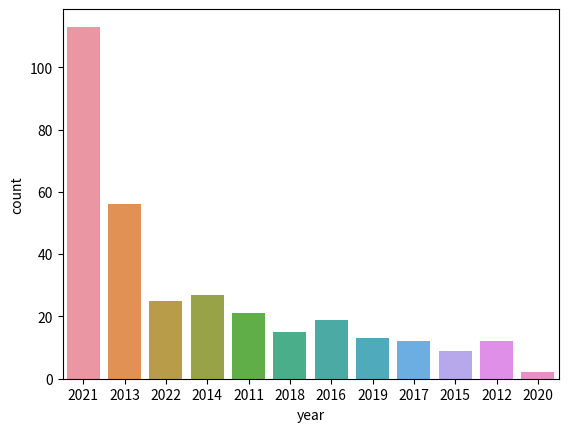

In [396]:
sns.countplot(data = df[df['new_new_연령'] == '20 ~ 29'].sort_values(by = 'new_new_연령'), x = 'year', order = df['year'].value_counts().index)

In [456]:
df[df['new_new_연령'] == '20 ~ 29']['year'].value_counts().sort_values(ascending = False)

2021    113
2013     56
2014     27
2022     25
2011     21
2016     19
2018     15
2019     13
2012     12
2017     12
2015      9
2020      2
Name: year, dtype: int64

In [397]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year'],
      dtype='object')

In [400]:
a_df = df[(df['당뇨여부'] == 1) | (df['고혈압여부'] == 1)]

In [402]:
pivot_df = pd.pivot_table(a_df, index = '흡연여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

chi-sqauare test
chisq :  59.425
p :  0.000


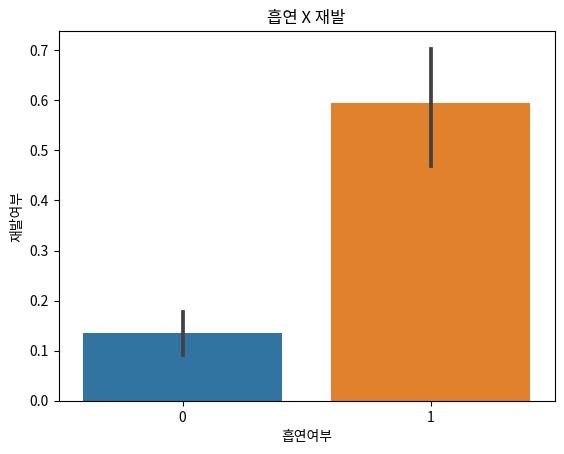

In [404]:
sns.barplot(data = a_df , x ='흡연여부', y = '재발여부')
plt.title('흡연 X 재발');

In [403]:
pivot_df
# 당뇨 or 고혈압이 있는 경우 , 흡연여부데 따른 재발 여부

재발여부,0,1
흡연여부,,
0,225,35
1,26,38


In [405]:
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI,new_new_연령,year
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,2155.3,4,Middle,0,1,중년,1.74,24.772097,30 ~ 39,2011
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,2143.1,4,Middle,0,1,청년,1.72,23.661439,10 ~ 19,2011
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,1868.7,4,Down,0,1,청년,1.77,21.705129,20 ~ 29,2011
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,1851.2,5,Middle,0,1,청년,1.72,23.661439,20 ~ 29,2013
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,2419.1,2,Up,0,1,장년,1.66,27.943098,50 ~ 59,2013


In [ ]:
sns.

In [ ]:
pivot_df = pd.pivot_table(st_df[], index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [182]:
df['month'] = df['수술일자'].apply(lambda x : x.split('-')[1])
month_df = df.groupby(['month'])[['count']].sum()

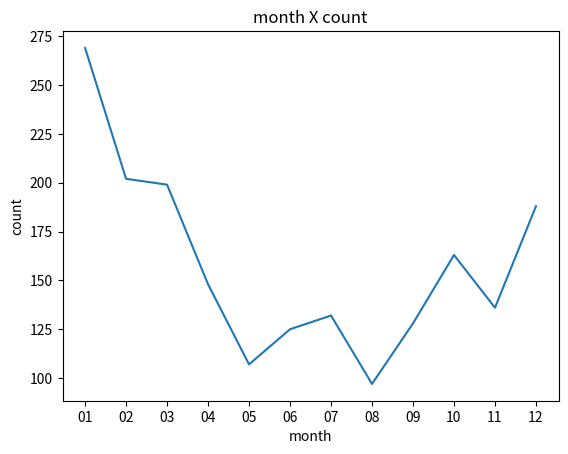

In [186]:
sns.lineplot(data = month_df , x = 'month', y = 'count')
plt.title('month X count');

In [ ]:
df['']

In [70]:
df['year_month'] = df['수술일자'].apply(lambda x : x[0:7])

In [71]:
year_month_df = df.groupby(['year_month'])[['count']].sum()

In [72]:
year_month_df.reset_index(inplace = True)

In [73]:
year_month_df

,year_month,count
0,2011-01,1
1,2011-02,1
2,2011-03,2
3,2011-04,25
4,2011-05,26
...,...,...
119,2022-04,13
120,2022-05,17
121,2022-06,30
122,2022-07,25


In [76]:
year_month_df['year'] = year_month_df['year_month'].apply(lambda x : x[0:4])
year_month_df['month'] = year_month_df['year_month'].apply(lambda x : x[5:7])
year_month_df


,year_month,count,year,month
0,2011-01,1,2011,01
1,2011-02,1,2011,02
2,2011-03,2,2011,03
3,2011-04,25,2011,04
4,2011-05,26,2011,05
...,...,...,...,...
119,2022-04,13,2022,04
120,2022-05,17,2022,05
121,2022-06,30,2022,06
122,2022-07,25,2022,07


In [ ]:
df_2011 = df[df['year_month']] 

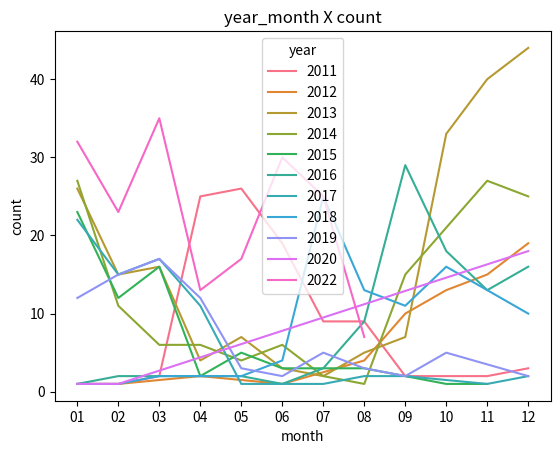

In [81]:
sns.lineplot(data = year_month_df[year_month_df['year'] != '2021'] , x = 'month', y = 'count', hue = 'year')
plt.title('year_month X count');

<Axes: xlabel='month', ylabel='count'>

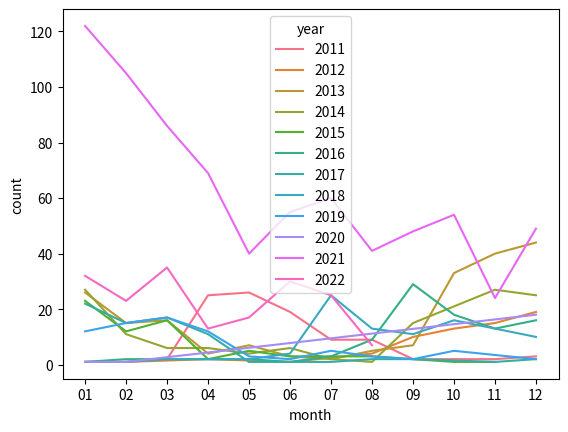

In [90]:
sns.lineplot(data = year_month_df , x = 'month', y = 'count', hue = 'year')

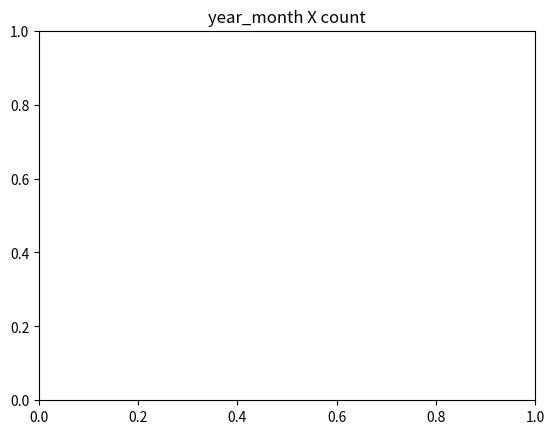

In [83]:
sns.lineplot(data = year_month_df[year_month_df['year'] == '2023'] , x = 'month', y = 'count')
plt.title('year_month X count');

In [93]:
df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,month,year_month
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,NaN,2155.30,4,Middle,0,1,중년,03,2011-03
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,NaN,2143.10,4,Middle,0,1,청년,04,2011-04
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,NaN,1868.70,4,Down,0,1,청년,05,2011-05
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,NaN,1851.20,5,Middle,0,1,청년,02,2013-02
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,NaN,2419.10,2,Up,0,1,장년,03,2013-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,550PT,23.5,3,55.0,0.0,0,0,0,0,0,...,0,-1.69,1777.50,4,Middle,0,1,중년,01,2021-01
1890,739PT,31.4,3,NaN,0.0,0,0,0,0,0,...,0,-2.06,1219.00,4,Middle,0,1,중년,01,2021-01
1891,890PT,24.9,1,NaN,0.0,0,1,0,0,0,...,0,-1.16,2324.83,4,Middle,1,1,중년,01,2021-01
1892,891PT,45.8,4,NaN,0.0,0,0,0,0,0,...,0,-1.93,2203.83,4,Middle,0,1,중년,01,2021-01


In [94]:
df['year'] = df['year_month'].apply(lambda x : x[0:4])

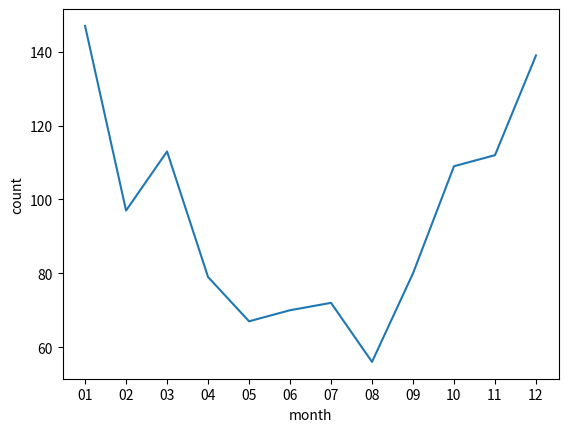

In [97]:
month = df[df['year'] != '2021'].groupby(['month'])[['count']].sum()
sns.lineplot(data = month , x = 'month', y = 'count');

In [108]:
df['직업'].isnull().sum()

415

In [110]:
df[(df['year'] == '2021') | (df['year'] == '2022')]['직업'].isnull().sum()

301

In [107]:
df[df['year'] == '2022']['직업'].value_counts()

사무직     47
자영업     12
학생      12
주부      12
군인       8
의료직      8
노동직      7
사업가      5
농업       4
공무원      4
건설업      3
운수업      3
교사       2
운동선수     1
Name: 직업, dtype: int64

In [106]:
df['직업'].value_counts()

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
의료직       40
농업        40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [105]:
df[df['year'] != '2021']['직업'].value_counts()

사무직      288
무직       164
자영업      102
학생        83
주부        72
군인        56
공무원       32
의료직       29
운수업       25
농업        24
노동직       23
사업가       18
교사        15
건설업       14
특수전문직     14
운동선수       8
예술가        6
Name: 직업, dtype: int64

In [103]:
df[(df['year'] == '2021') & (df['직업'] == '무직')]


,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,month,year_month,year


In [102]:
df[(df['year'] != '2021') & (df['직업'] == '무직')]


,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,month,year_month,year
7,963PT,44.9,4,26.0,0.0,0,0,0,0,0,...,NaN,1753.1,5,Up,0,1,장년,09,2014-09,2014
11,1514PT,47.0,1,NaN,0.0,0,0,0,0,0,...,NaN,1783.0,4,Middle,0,1,중년,10,2016-10,2016
15,975PT,49.4,3,26.0,0.0,0,0,1,0,0,...,-1.6,1761.5,4,Middle,0,1,장년,05,2019-05,2019
264,980PT,35.4,3,26.0,0.0,0,1,2,1,0,...,-1.8,2471.5,2,Extremely down,0,1,노년,09,2012-09,2012
281,984PT,50.5,3,26.0,0.0,0,0,2,0,0,...,-1.8,2126.8,4,Middle,1,1,노년,01,2013-01,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,1876PT,23.9,2,NaN,0.0,0,1,0,1,0,...,NaN,1766.8,4,Middle,0,1,중년,03,2019-03,2019
1689,1874PT,6.4,1,NaN,0.0,0,0,0,0,0,...,NaN,2237.9,4,Middle,1,1,중년,03,2019-03,2019
1695,1606PT,20.5,5,NaN,0.0,1,1,2,0,0,...,0.6,2206.0,4,Middle,0,1,노년,04,2019-04,2019
1702,1779PT,40.9,4,NaN,0.0,0,1,0,0,0,...,NaN,2866.7,5,Middle,0,1,노년,09,2019-09,2019


In [132]:
def season(x):
    if x in ['01' , '12' , '02']:
        result = '겨울'
    elif x in ['03' , '04' , '05']:
        result = '봄'
    elif x in ['06' , '07' , '08']:
        result = '여름'
    else:
        result = '가을'
    return result

In [133]:
df['season'] = df['month'].apply(lambda x: season(x))

In [137]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'month',
       'year_month', 'year', 'season'],
      dtype='object')

In [140]:
df[df['season'] == '여름' |]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,디스크단면적,디스크위치,척추이동척도,척추전방위증,count,new_연령,month,year_month,year,season
106,898PT,34.4,2,NaN,0.0,0,1,0,0,0,...,1942.00,4,Down,0,1,중년,06,2021-06,2021,여름
107,809PT,37.6,2,NaN,0.0,0,0,1,1,0,...,2075.30,4,Middle,0,1,중년,06,2021-06,2021,여름
108,899PT,24.6,1,NaN,0.0,0,0,0,0,0,...,1745.00,3,Middle,0,1,중년,06,2021-06,2021,여름
109,47PT,54.1,2,18.0,0.0,0,0,1,0,0,...,1718.90,4,Down,0,1,노년,06,2021-06,2021,여름
110,206PT,25.4,2,NaN,0.0,0,0,0,0,0,...,1694.53,4,Middle,0,1,중년,06,2021-06,2021,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,379PT,27.6,1,NaN,0.0,0,1,0,0,0,...,1694.53,4,Down,0,1,장년,07,2022-07,2022,여름
1877,294PT,30.2,1,NaN,0.0,0,0,0,0,0,...,2308.00,4,Middle,0,1,중년,07,2022-07,2022,여름
1878,295PT,53.6,3,NaN,0.0,0,0,0,0,0,...,1479.00,4,Middle,0,1,중년,07,2022-07,2022,여름
1879,117PT,49.6,3,30.0,0.0,0,0,0,0,0,...,2142.70,4,Down,0,1,중년,07,2022-07,2022,여름


In [141]:
season_1 = df[(df['season'] == '여름') | (df['season'] == '가을')]
season_2 = df[(df['season'] != '여름') | (df['season'] != '가을')]

In [142]:
season_1['직업'].value_counts()

사무직      206
자영업       68
무직        63
학생        53
주부        45
군인        40
운수업       19
노동직       19
농업        19
공무원       17
의료직       17
사업가       16
교사        13
특수전문직     12
건설업        7
운동선수       7
예술가        5
Name: 직업, dtype: int64

In [143]:
season_2['직업'].value_counts()


사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
의료직       40
농업        40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [144]:
season_1['new_연령'].value_counts()


중년     426
장년     155
청년     143
노년      39
청소년     18
Name: new_연령, dtype: int64

In [145]:
season_2['new_연령'].value_counts()


중년     1050
장년      356
청년      353
노년       96
청소년      39
Name: new_연령, dtype: int64

In [146]:
season_1['성별'].value_counts()

1    485
2    296
Name: 성별, dtype: int64

In [148]:
season_2['성별'].value_counts()


1    1168
2     726
Name: 성별, dtype: int64

In [ ]:
family_df = df[['가족력','재발여부','count']]
family_df.dropna(inplace = True)

/tmp/ipykernel_6111/1096707289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df.dropna(inplace = True)


### 가족력 X 재발여부

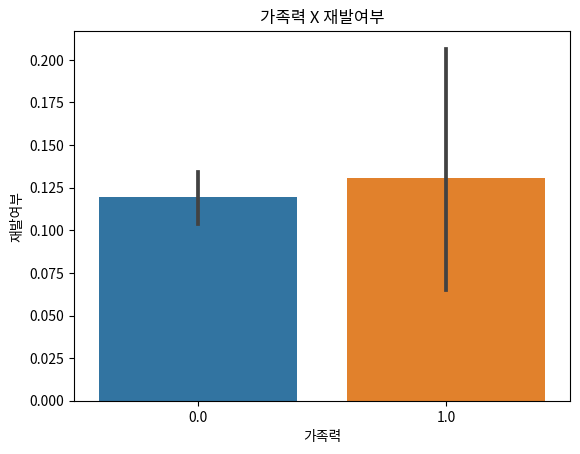

In [17]:
# 가족력 X  재발여부
sns.barplot(data = family_df , x = '가족력', y = '재발여부')
plt.title('가족력 X 재발여부');

$H_0 :$ 가족력에 따라 재발여부에 차이가 없다. \
$H_1 :$ 가족력에 따라 재발여부에 차이가 있다.

In [19]:
new_df = df.pivot_table(index = '고혈압여부', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)

In [20]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)

print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')
# 

chi-sqauare test
chisq :  10.948
p :  0.001


### 말초동맥질환여부

In [23]:
df['말초동맥질환여부'].value_counts()
# 표본이 너무 적다...!

0    1886
1       8
Name: 말초동맥질환여부, dtype: int64

### 빈혈여부

In [24]:
df['빈혈여부'].value_counts()
# 표본이 너무 적다...!

0    1848
1      46
Name: 빈혈여부, dtype: int64

### 성별

In [26]:
df['성별'].value_counts()

1    1168
2     726
Name: 성별, dtype: int64

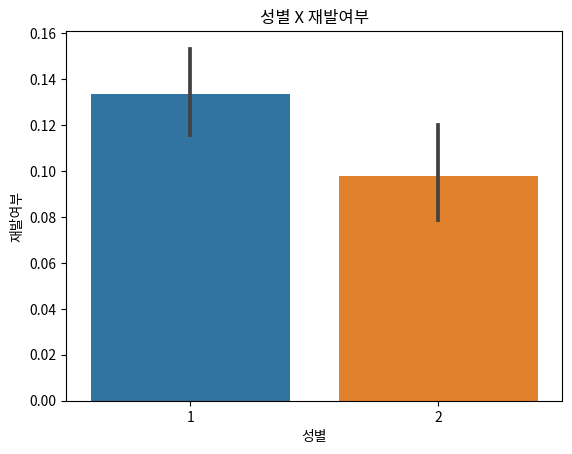

In [29]:
# 성별 X  재발여부
sns.barplot(data = df , x = '성별', y = '재발여부')
plt.title('성별 X 재발여부');

In [30]:
new_df = df.pivot_table(index = '성별', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)

In [32]:
chi2(new_df)

chi-sqauare test
chisq :  5.095
p :  0.024


### 우을증여부

In [38]:
df = df[df['우울증여부'] != 2]

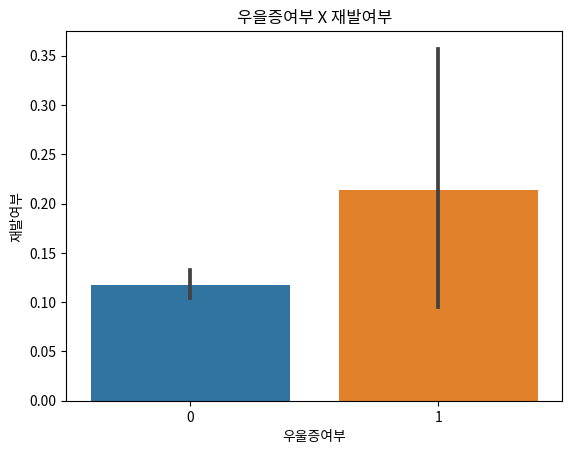

In [39]:
# 우을증 X  재발여부
sns.barplot(data = df , x = '우울증여부', y = '재발여부')
plt.title('우을증여부 X 재발여부');

In [40]:
new_df = df.pivot_table(index = '우울증여부', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)

In [41]:
chi2(new_df)

chi-sqauare test
chisq :  2.768
p :  0.096


### 종양진행여부 X 재발여부

In [42]:
df['종양진행여부'].value_counts()


0    1887
1       6
Name: 종양진행여부, dtype: int64

### 수술기법 X 재발여부

In [43]:
df['수술기법'].value_counts()

TELD    1672
IELD     140
Name: 수술기법, dtype: int64

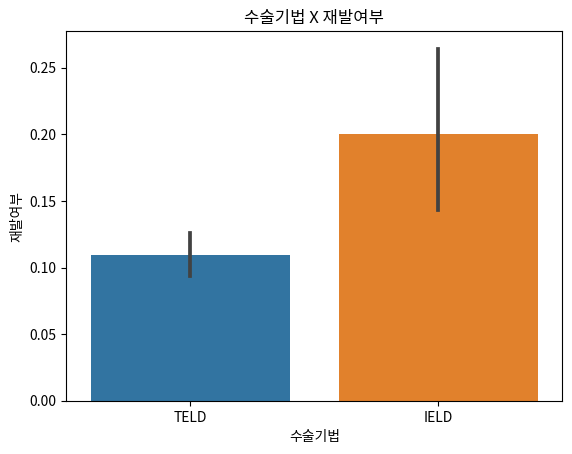

In [44]:
# 수술기법 X  재발여부
sns.barplot(data = df , x = '수술기법', y = '재발여부')
plt.title('수술기법 X 재발여부');

In [45]:
new_df = df.pivot_table(index = '수술기법', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)
chi2(new_df)

chi-sqauare test
chisq :  9.434
p :  0.002


### 수술실패 

In [46]:
df['수술실패여부'].value_counts()

0    1778
1     115
Name: 수술실패여부, dtype: int64

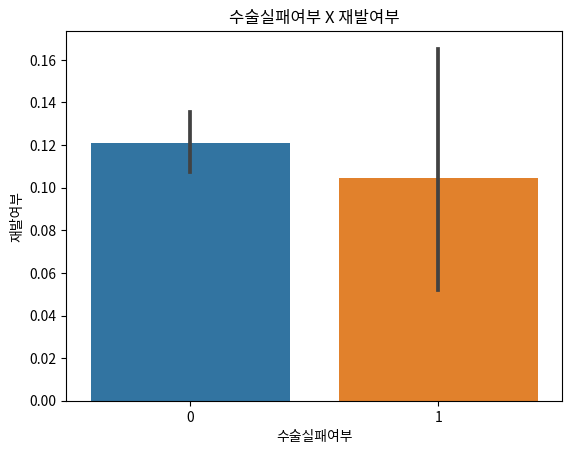

In [48]:
# 수술실패여부 X  재발여부
sns.barplot(data = df , x = '수술실패여부', y = '재발여부')
plt.title('수술실패여부 X 재발여부');

In [49]:
new_df = df.pivot_table(index = '수술실패여부', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)
chi2(new_df)

chi-sqauare test
chisq :  0.146
p :  0.702


### Modic change

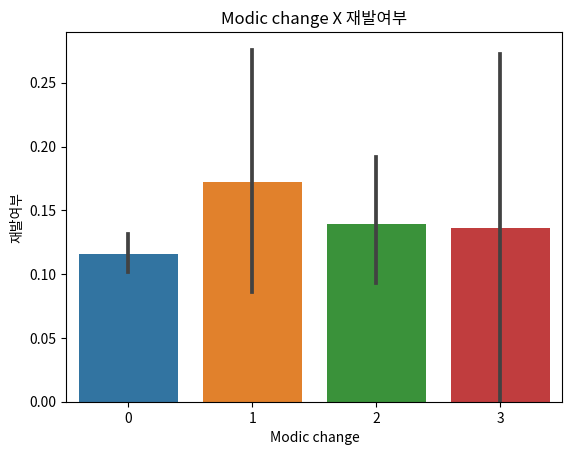

In [52]:
# Modic change X  재발여부
sns.barplot(data = df , x = 'Modic change', y = '재발여부')
plt.title('Modic change X 재발여부');

In [53]:
new_df = df.pivot_table(index = 'Modic change', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)
chi2(new_df)

chi-sqauare test
chisq :  2.464
p :  0.482


### Vaccum disc

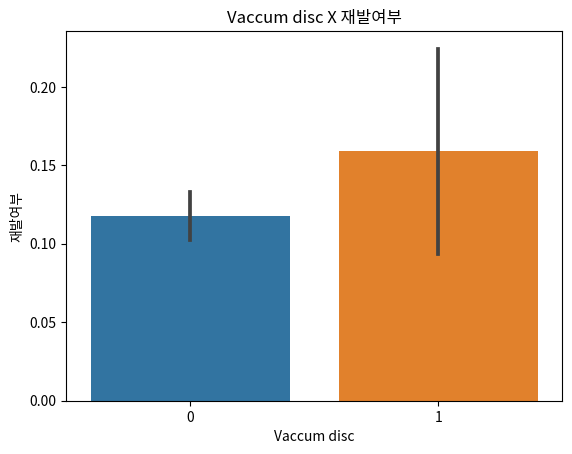

In [55]:
# Vaccum X  재발여부
sns.barplot(data = df , x = 'Vaccum disc', y = '재발여부')
plt.title('Vaccum disc X 재발여부');

In [57]:
new_df = df.pivot_table(index = 'Vaccum disc', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)
chi2(new_df)

chi-sqauare test
chisq :  1.264
p :  0.261


### Location of heriniation

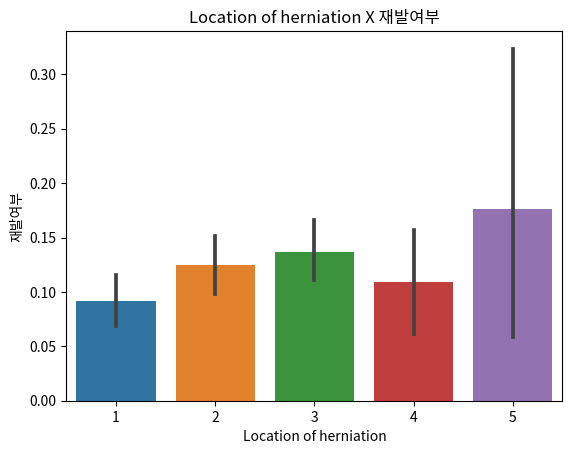

In [60]:
sns.barplot(data = df , x = 'Location of herniation', y = '재발여부')
plt.title('Location of herniation X 재발여부');

In [61]:
new_df = df.pivot_table(index = 'Location of herniation', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)
chi2(new_df)

chi-sqauare test
chisq :  6.961
p :  0.138


---

---

In [64]:
# 정규성 검정
def  ttest1(df):
    statistic , p = stats.shapiro(df)
    print(f'statistic : {statistic}, p-value = {p}')

In [65]:
# 등분산성 검정
def ttest2(df1, df2):
    stats.bartlett(df1, df2)

In [66]:
# t-test
def ttest(df1, df2, rihgt = True):
    t_result = stats.ttest_ind(df1,df2, equal_var = rihgt)
    t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
    print("2-Sample t-test")
    print("t:{}".format(t))
    print("p:{}".format(p))

In [76]:
# 정규성 검정 불통
def man(df1, df2):
    res = stats.mannwhitneyu(df1, df1)
    print(res)

### Large Lymphoyte

In [67]:
df1 = df[df['재발여부'] == 0][['Large Lymphocyte']]
df2 = df[df['재발여부'] == 1][['Large Lymphocyte']]

In [87]:
len(df1) , len(df2)

(423, 39)

In [71]:
# 정규성 검정
print('df1 : ')
ttest1(df1)
print()
print('df2 : ')
ttest1(df2)

df1 : 
statistic : 0.985264241695404, p-value = 4.952849762263067e-12

df2 : 
statistic : 0.9847365617752075, p-value = 0.01532847061753273


In [89]:
ttest2(df1, df2)

ValueError: Samples must be one-dimensional.

In [77]:
man(df1, df2)

MannwhitneyuResult(statistic=array([1387778.]), pvalue=array([1.]))


### ODI

In [83]:
df1 = df[df['재발여부'] == 0][['ODI']].dropna()
df2 = df[df['재발여부'] == 1][['ODI']].dropna()

In [84]:
df1

,ODI
0,44.0
1,21.0
2,13.0
4,31.0
7,26.0
...,...
1879,30.0
1881,36.0
1887,42.0
1888,29.0


In [85]:
print('df1 : ')
ttest1(df1)
print()
print('df2 : ')
ttest1(df2)

df1 : 
statistic : 0.9830570220947266, p-value = 7.434906729031354e-05

df2 : 
statistic : 0.8726600408554077, p-value = 0.0003969699318986386


In [86]:
man(df1, df2)

MannwhitneyuResult(statistic=array([89464.5]), pvalue=array([1.]))


In [409]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year'],
      dtype='object')

In [431]:
df['new_new_연령'].value_counts()

40 ~ 49    581
30 ~ 39    469
20 ~ 29    324
50 ~ 59    272
60 ~ 69    115
10 ~ 19     68
70 ~ 79     60
80 ~ 89      5
Name: new_new_연령, dtype: int64

In [433]:
gender_0 = df.groupby(['성별'])[['count']].sum()
gender_1 = df[df['new_new_연령'] == '10 ~ 19'].groupby(['성별'])[['count']].sum()
gender_2 = df[df['new_new_연령'] == '20 ~ 29'].groupby(['성별'])[['count']].sum()
gender_3 = df[df['new_new_연령'] == '30 ~ 39'].groupby(['성별'])[['count']].sum()
gender_4 = df[df['new_new_연령'] == '40 ~ 49'].groupby(['성별'])[['count']].sum()
gender_5 = df[df['new_new_연령'] == '50 ~ 59'].groupby(['성별'])[['count']].sum()
gender_6 = df[df['new_new_연령'] == '60 ~ 69'].groupby(['성별'])[['count']].sum()
gender_7 = df[df['new_new_연령'] == '70 ~ 79'].groupby(['성별'])[['count']].sum()
gender_8 = df[df['new_new_연령'] == '80 ~ 89'].groupby(['성별'])[['count']].sum()



In [420]:
gender

,count
성별,
1,1168
2,726


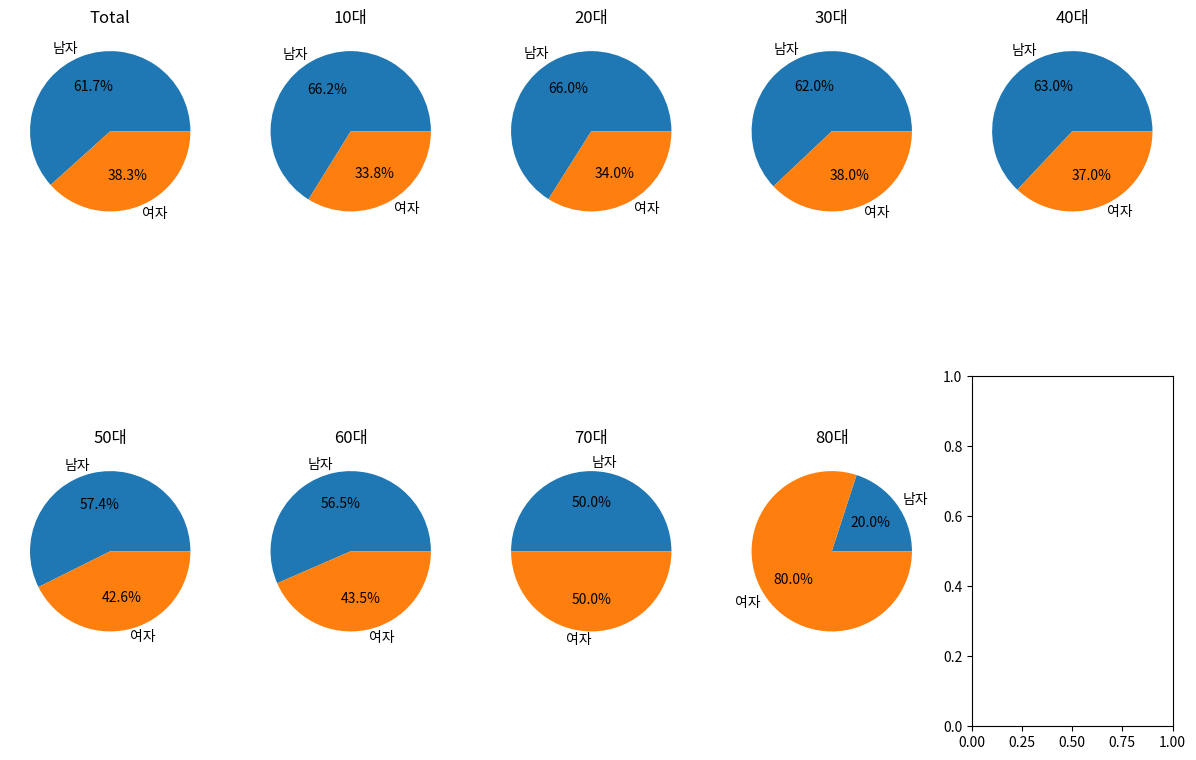

In [436]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (15,10))
ax[0,0].pie(gender_0['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[0,0].set_title('Total')

ax[0,1].pie(gender_1['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[0,1].set_title('10대')

ax[0,2].pie(gender_2['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[0,2].set_title('20대')

ax[0,3].pie(gender_3['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[0,3].set_title('30대')

ax[0,4].pie(gender_4['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[0,4].set_title('40대')

ax[1,0].pie(gender_5['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[1,0].set_title('50대')

ax[1,1].pie(gender_6['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[1,1].set_title('60대')

ax[1,2].pie(gender_7['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[1,2].set_title('70대')

ax[1,3].pie(gender_8['count'], labels = ['남자' , '여자'],  autopct='%.1f%%')
ax[1,3].set_title('80대');
# 여성의 방문횟수가 남성의 방문횟수보다 많기 때문에 여성 환자가 많아야 한다!!
# 하지만 전체에서 남자가 많다!
# 남성 방문횟수 6.25회 / 7.45 회 - 

<Axes: xlabel='new_new_연령', ylabel='count'>

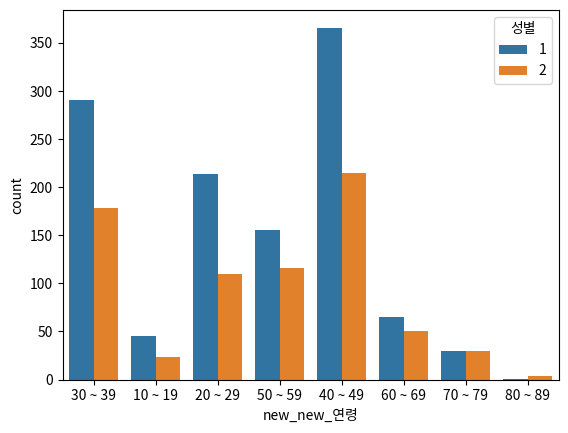

In [410]:
sns.countplot(data = df, x = 'new_new_연령' , hue = '성별') 

### 5번

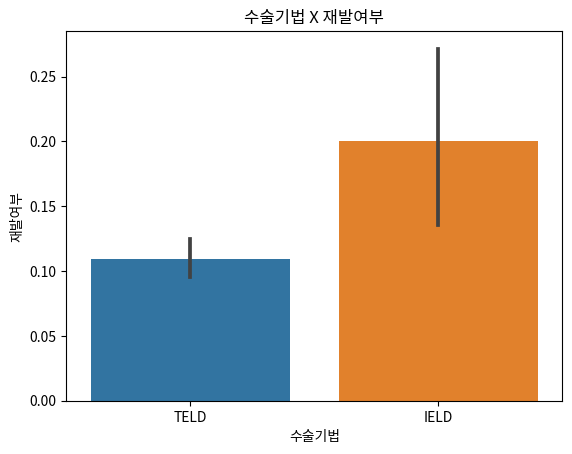

In [442]:
sns.barplot(data = df , x = '수술기법', y = '재발여부')
plt.title('수술기법 X 재발여부');

In [443]:
pivot_df

수술기법,IELD,TELD
재발여부,,
0,112,1490
1,28,183


In [441]:
pivot_df = pd.pivot_table(df, index = '재발여부', columns = '수술기법', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

chi-sqauare test
chisq :  9.453
p :  0.002


In [445]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year'],
      dtype='object')

In [446]:
df['new_new_연령'].value_counts()

40 ~ 49    581
30 ~ 39    469
20 ~ 29    324
50 ~ 59    272
60 ~ 69    115
10 ~ 19     68
70 ~ 79     60
80 ~ 89      5
Name: new_new_연령, dtype: int64

<Axes: xlabel='new_new_연령', ylabel='재발여부'>

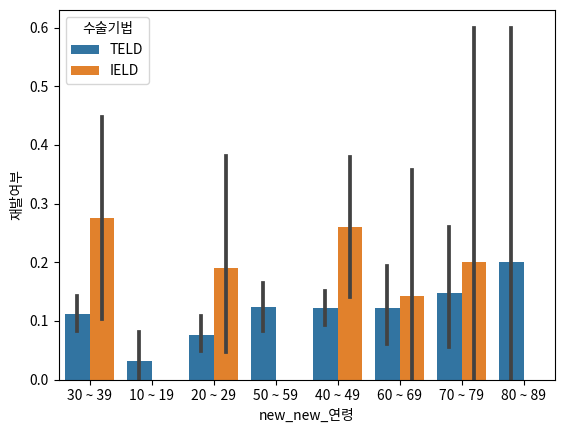

In [447]:
sns.barplot(data = df, x = 'new_new_연령' , y = '재발여부' , hue = '수술기법')

In [448]:
pivot_df = pd.pivot_table(df, index = '재발여부', columns = 'new_new_연령', values = 'count', aggfunc = 'sum')
chi2(pivot_df) 

chi-sqauare test
chisq :  8.576
p :  0.285


<Axes: xlabel='성별', ylabel='재발여부'>

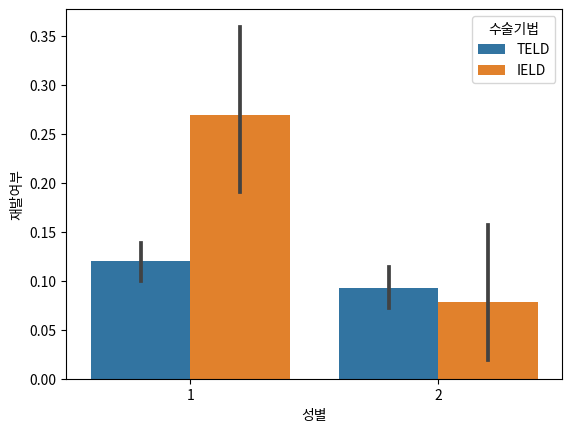

In [450]:
sns.barplot(data = df, x = '성별' , y = '재발여부' , hue = '수술기법')


In [457]:
# 남성의 경우 수술기법에 따라 재발여부 차이가 있다 없다!?
m_df = df[df['성별'] == 1]
pivot_df = pd.pivot_table(m_df, index = '재발여부', columns = '수술기법', values = 'count', aggfunc = 'sum')
chi2(pivot_df)
# 남성의 경우 있다! 

chi-sqauare test
chisq :  14.813
p :  0.000


In [458]:
# 여성의 경우 수술기법에 따라 재발여부 차이가 있다 없다!?
m_df = df[df['성별'] == 2]
pivot_df = pd.pivot_table(m_df, index = '재발여부', columns = '수술기법', values = 'count', aggfunc = 'sum')
chi2(pivot_df)
# 여성의 경우 없다! 
# TELD 를 했을때 병원 입장에서 시간 save

chi-sqauare test
chisq :  0.007
p :  0.934


<Axes: xlabel='척추이동척도', ylabel='재발여부'>

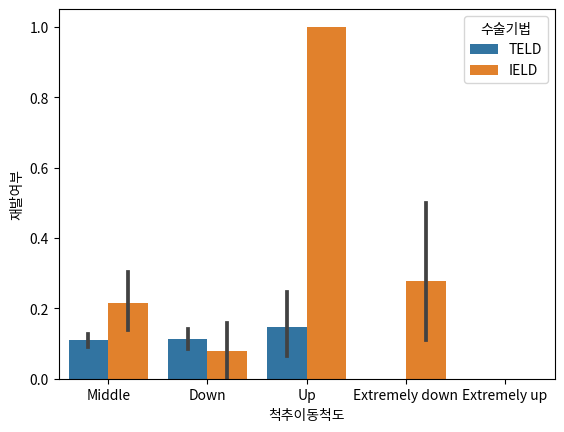

In [454]:
sns.barplot(data = df, x ='척추이동척도' , y = '재발여부' , hue = '수술기법')


In [ ]:
sns.barplot(data = df, x ='척추이동척도' , y = '재발여부' , hue = '수술기법')

In [439]:
pivot_df

BMI            Instability           Large Lymphocyte             \
수술기법       IELD       TELD        IELD      TELD             IELD       TELD   
재발여부                                                                           
0     23.601789  23.865793    0.044643  0.039597        42.004464  39.337181   
1     25.315362  25.578680    0.000000  0.049180        36.589286  37.709836   

     Location of herniation                MF + ES               ...  \
수술기법                   IELD      TELD         IELD         TELD  ...   
재발여부                                                             ...   
0                  2.491071  2.280537  2067.205000  2080.832859  ...   
1                  2.321429  2.459016  2297.906071  2143.012404  ...   

        헤모글로빈수치              혈전합병증여부              환자통증정도            \
수술기법       IELD       TELD      IELD      TELD      IELD      TELD   
재발여부                                                                 
0     14.611161  14.557114  0.008929  0.000671  6.839286  6.893289   
1     14.831429  14.719835  0.035714  0.005464  6.750000  6.808743   

     후방디스크높이(mm)                흡연여부            
수술기법        IELD      TELD      IELD      TELD  
재발여부                                            
0       7.472768  8.467215  0.196429  0.189262  
1       7.821071  8.099836  0.392857  0.409836  

[2 rows x 90 columns]

In [ ]:
df[df['수술기법'] == 'TELD']['수술기법']

In [464]:
surgery_1 = df[df['수술기법'] == 'TELD']['수술시간'].dropna()
surgery_2 = df[df['수술기법'] == 'IELD']['수술시간'].dropna()

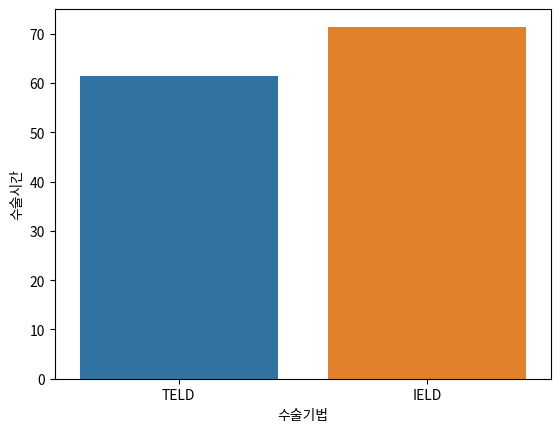

In [467]:
sns.barplot(data = df, x = '수술기법' , y = '수술시간', errorbar = ('ci', False));

In [465]:
ttest(surgery_1, surgery_2)

2-Sample t-test
t:-4.416328576675855
p:1.0650866279297122e-05


In [468]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year'],
      dtype='object')

In [471]:
df['퇴원일자']

0       2011-03-28
1       2011-04-06
2       2011-05-09
3       2013-02-13
4       2013-03-19
           ...    
1889    2021-01-02
1890    2021-01-02
1891    2021-01-02
1892    2021-01-02
1893    2021-01-02
Name: 퇴원일자, Length: 1894, dtype: object

In [486]:
df['퇴원일자'] = pd.to_datetime(df['퇴원일자'])
df['수술일자'] = pd.to_datetime(df['수술일자'])

df['회복기간'] = df['퇴원일자'] - df['수술일자']

In [487]:
df['회복기간'].describe()

count                          1894
mean      4 days 09:27:56.451953537
std      38 days 19:46:17.051564449
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 2 days 00:00:00
max              1126 days 00:00:00
Name: 회복기간, dtype: object

In [488]:
df['회복기간'] = df['회복기간'].astype('str')

In [489]:
df['회복기간'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 회복기간
Non-Null Count  Dtype 
--------------  ----- 
1894 non-null   object
dtypes: object(1)
memory usage: 14.9+ KB


In [493]:
df["회복기간"] = df["회복기간"].str.replace(' days','')
df["회복기간"] = df["회복기간"].astype(int)

<Axes: >

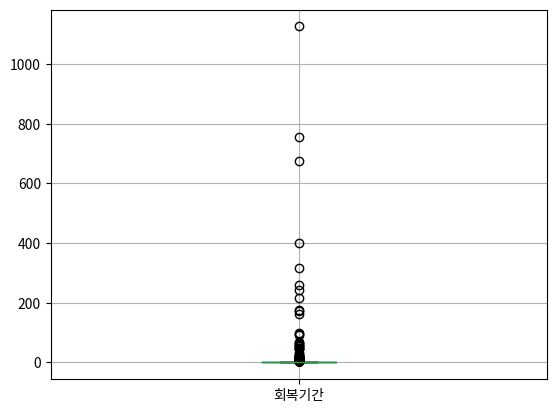

In [496]:
df[['회복기간']].boxplot()

In [497]:
time_df = df[df['회복기간'] <= 100]

<Axes: >

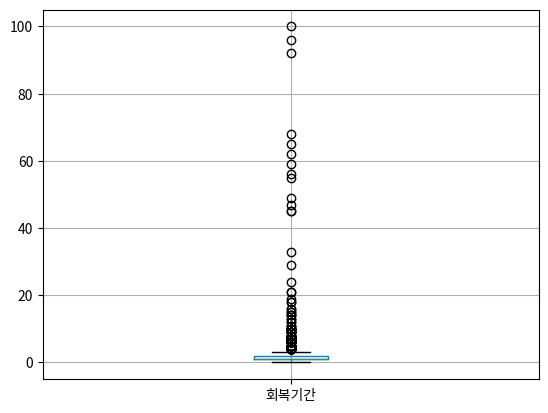

In [499]:
time_df[['회복기간']].boxplot()

In [522]:
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI,new_new_연령,year,회복기간
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,4,Middle,0,1,중년,1.74,24.772097,30 ~ 39,2011,0
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,4,Middle,0,1,청년,1.72,23.661439,10 ~ 19,2011,2
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,4,Down,0,1,청년,1.77,21.705129,20 ~ 29,2011,0
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,5,Middle,0,1,청년,1.72,23.661439,20 ~ 29,2013,2
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,2,Up,0,1,장년,1.66,27.943098,50 ~ 59,2013,1


In [523]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year', '회복기간'],
      dtype='object')

In [533]:
df[(df['수술기법'] == 'TELD') & (df['수술실패여부'] == 1)]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI,new_new_연령,year,회복기간
21,586PT,22.1,3,25.0,0.0,0,0,0,0,0,...,3,Middle,0,1,중년,1.75,24.457143,40 ~ 49,2021,1
35,568PT,32.6,1,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,중년,1.70,24.671280,40 ~ 49,2021,1
45,576PT,54.6,2,44.0,0.0,0,0,1,0,0,...,4,Middle,0,1,중년,1.65,24.573003,40 ~ 49,2021,1
60,353PT,47.2,3,NaN,0.0,0,0,2,0,0,...,5,Middle,0,1,청년,1.62,22.824265,20 ~ 29,2021,0
69,599PT,53.4,1,40.0,0.0,0,0,0,0,0,...,4,Down,0,1,중년,1.76,24.373709,40 ~ 49,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,148PT,30.6,1,28.0,0.0,0,0,2,0,0,...,5,Middle,0,1,중년,1.84,24.102079,30 ~ 39,2021,1
1846,84PT,40.4,3,41.0,0.0,0,0,0,1,0,...,4,Down,0,1,중년,1.79,24.375020,30 ~ 39,2021,2
1859,310PT,36.4,4,NaN,0.0,0,0,0,0,0,...,4,Up,0,1,중년,1.69,24.613984,40 ~ 49,2022,1
1871,184PT,29.0,1,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,청년,1.84,24.249764,20 ~ 29,2022,1


In [534]:
df[(df['수술기법'] == 'IELD') & (df['수술실패여부'] == 1)]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,디스크위치,척추이동척도,척추전방위증,count,new_연령,New_신장,BMI,new_new_연령,year,회복기간
194,245PT,47.5,3,NaN,0.0,0,0,0,1,0,...,4,Middle,0,1,중년,1.75,24.391837,30 ~ 39,2021,2
226,715PT,47.5,3,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,중년,1.54,23.191095,40 ~ 49,2022,0
369,1437PT,40.2,3,NaN,0.0,0,0,0,0,0,...,5,Extremely up,0,1,중년,1.74,22.790329,40 ~ 49,2014,3
575,103PT,45.1,3,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,중년,1.63,24.840980,30 ~ 39,2021,1
794,1792PT,53.2,3,NaN,0.0,0,0,0,0,0,...,5,Down,0,1,장년,1.72,20.281233,60 ~ 69,2015,11
823,1819PT,49.0,1,NaN,0.0,0,0,0,0,0,...,5,Middle,0,1,장년,1.62,21.338211,50 ~ 59,2017,3
996,1150PT,45.1,3,NaN,0.0,0,0,0,0,0,...,5,Middle,0,1,중년,1.58,31.645570,30 ~ 39,2011,3
1544,1755PT,42.5,2,NaN,0.0,0,0,0,0,0,...,5,Down,0,1,중년,1.75,26.122449,40 ~ 49,2015,4
1592,1463PT,47.5,3,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,장년,1.50,23.555556,60 ~ 69,2016,4
1883,573PT,45.1,3,NaN,0.0,0,0,0,0,0,...,4,Middle,0,1,중년,1.71,24.554564,30 ~ 39,2021,0


In [537]:
pivot_df = pd.pivot_table(df, index = '수술기법', columns = '수술실패여부' , values = 'count', aggfunc = 'sum')

In [540]:
pivot_df

수술실패여부,0,1
수술기법,,
IELD,130,10
TELD,1571,102


<Axes: xlabel='수술기법', ylabel='수술실패여부'>

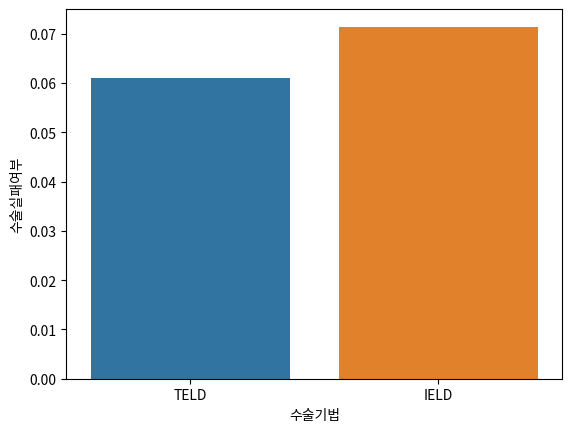

In [542]:
sns.barplot(data = df , x = '수술기법', y = '수술실패여부', errorbar = ('ci', False))

In [543]:
df['수술기법'].value_counts()

TELD    1673
IELD     140
Name: 수술기법, dtype: int64

In [539]:
chi2(pivot_df)

chi-sqauare test
chisq :  0.097
p :  0.756


In [526]:
len(df[df['수술기법'] == 'TELD'][['수술실패여부']])

1673

In [527]:
len(df[df['수술기법'] == 'IELD'][['수술실패여부']])

140

In [500]:
t_time = time_df[time_df['수술기법'] == 'TELD'][['회복기간']]
i_time = time_df[time_df['수술기법'] == 'IELD'][['회복기간']]

In [519]:
t_time.describe()

,회복기간
count,1662.000000
mean,2.040313
std,6.113137
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,100.000000


In [521]:
t_time.columns

Index(['회복기간'], dtype='object')

In [520]:
i_time.describe()

,회복기간
count,140.000000
mean,1.664286
std,1.928994
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


In [503]:
ttest(t_time , i_time)
# 회복기간에는 유의미한 차이가 없다!

2-Sample t-test
t:[0.72461412]
p:[0.46878297]


In [505]:
df['척추이동척도'].value_counts()

Middle            1260
Down               513
Up                  65
Extremely down      40
Extremely up        16
Name: 척추이동척도, dtype: int64

In [507]:
df_1 = df[(df['수술기법'] == 'IELD') & ((df['척추이동척도'] == 'Extremely down') | (df['척추이동척도'] == 'Extremely up'))]['재발여부']
df_2 = df[(df['수술기법'] == 'TELD') & ((df['척추이동척도'] == 'Extremely down') | (df['척추이동척도'] == 'Extremely up'))]['재발여부']

In [511]:
df_1 = df[(df['척추이동척도'] == 'Extremely down') | (df['척추이동척도'] == 'Extremely up')]

In [516]:
pivot_df = pd.pivot_table(df_1 , index = '재발여부' , columns = '수술기법', values = 'count', aggfunc = 'sum')

In [518]:
pivot_df

수술기법,IELD,TELD
재발여부,,
0,15.0,31.0
1,5.0,NaN


In [517]:
chi2(pivot_df)

chi-sqauare test
chisq :  nan
p :  nan


In [544]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year', '회복기간'],
      dtype='object')

In [554]:
group_df = df.groupby(['직업'])[['재발여부','count']].agg({'재발여부' : 'mean',
                                                            'count' : 'sum'})

In [555]:
group_df.sort_values(by = '재발여부', ascending = False)

,재발여부,count
직업,,
건설업,0.235294,17
운동선수,0.214286,14
교사,0.200000,30
공무원,0.176471,51
의료직,0.175000,40
자영업,0.169591,171
사무직,0.135857,449
사업가,0.128205,39
노동직,0.119048,42


In [556]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '혈전합병증여부', '흡연여부', '통증기간(월)', '입원일자', '퇴원일자',
       '수술기법', '수술시간', '수술실패여부', '재발여부', '헤모글로빈수치', '환자통증정도', '혈액형', '수술일자',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'count', 'new_연령', 'New_신장',
       'BMI', 'new_new_연령', 'year', '회복기간'],
      dtype='object')

In [79]:
cluster_df = df[['성별','고혈압여부', '당뇨여부', 'BMI', '헤모글로빈수치', '전방디스크높이(mm)' , '후방디스크높이(mm)', '지방축적도', 'MF + ES', 'PI', 'PT', 'Modic change', 'Seg Angle(raw)', '디스크단면적' , '척추이동척도' , '재발여부' , '수술실패여부']]

In [80]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   성별              1736 non-null   int64  
 1   고혈압여부           1736 non-null   int64  
 2   당뇨여부            1736 non-null   int64  
 3   BMI             1736 non-null   float64
 4   헤모글로빈수치         1736 non-null   float64
 5   전방디스크높이(mm)     1736 non-null   float64
 6   후방디스크높이(mm)     1736 non-null   float64
 7   지방축적도           1736 non-null   float64
 8   MF + ES         1736 non-null   float64
 9   PI              1736 non-null   float64
 10  PT              1736 non-null   float64
 11  Modic change    1736 non-null   int64  
 12  Seg Angle(raw)  1736 non-null   float64
 13  디스크단면적          1736 non-null   float64
 14  척추이동척도          1736 non-null   object 
 15  재발여부            1736 non-null   int64  
 16  수술실패여부          1736 non-null   int64  
dtypes: float64(10), int64(6), object(

In [81]:
cluster_df

,성별,고혈압여부,당뇨여부,BMI,헤모글로빈수치,전방디스크높이(mm),후방디스크높이(mm),지방축적도,MF + ES,PI,PT,Modic change,Seg Angle(raw),디스크단면적,척추이동척도,재발여부,수술실패여부
0,1,0,0,24.772097,15.10,13.3,11.7,318.60,2425.80,49.7,27.6,0,1.2,2155.30,Middle,0,0
1,1,0,0,23.661439,16.00,17.2,8.3,153.70,2677.20,36.3,4.5,0,7.3,2143.10,Middle,0,0
2,1,0,0,21.705129,15.00,10.0,6.9,117.00,1704.00,41.3,17.4,0,13.4,1868.70,Down,0,0
3,1,0,0,23.661439,15.80,13.6,6.2,348.30,2502.20,45.7,16.6,0,20.1,1851.20,Middle,0,0
4,1,0,0,27.943098,15.00,11.1,5.8,86.80,2741.50,54.5,16.7,0,2.9,2419.10,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2,0,0,24.541205,19.28,11.0,7.6,87.80,1667.40,27.7,9.1,0,10.7,1777.50,Middle,0,1
1732,2,0,0,21.107266,13.66,6.9,4.1,85.50,2127.00,34.6,14.1,1,20.8,1219.00,Middle,1,0
1733,2,1,0,20.957171,15.62,9.4,8.7,118.04,3241.98,35.6,10.7,0,8.4,2324.83,Middle,0,0
1734,1,0,0,16.906171,13.61,12.4,11.1,166.48,2332.75,30.7,2.3,0,20.4,2203.83,Middle,0,0


In [83]:
cluster_df['성별'] = cluster_df['성별'].replace('2','0')

/tmp/ipykernel_31754/1860490214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['성별'] = cluster_df['성별'].replace('2','0')


In [84]:
obj_df = cluster_df.select_dtypes('object')
num_df = cluster_df.select_dtypes(['int','float'])

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [86]:
cluster_df.dropna(inplace =True)

/tmp/ipykernel_31754/1935007979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.dropna(inplace =True)


In [87]:
X

,고혈압여부,당뇨여부,BMI,헤모글로빈수치,전방디스크높이(mm),후방디스크높이(mm),지방축적도,MF + ES,PI,PT,Modic change,Seg Angle(raw),디스크단면적,척추이동척도
0,0,0,24.772097,15.10,13.3,11.7,318.60,2425.80,49.7,27.6,0,1.2,2155.30,Middle
1,0,0,23.661439,16.00,17.2,8.3,153.70,2677.20,36.3,4.5,0,7.3,2143.10,Middle
2,0,0,21.705129,15.00,10.0,6.9,117.00,1704.00,41.3,17.4,0,13.4,1868.70,Down
3,0,0,23.661439,15.80,13.6,6.2,348.30,2502.20,45.7,16.6,0,20.1,1851.20,Middle
4,0,0,27.943098,15.00,11.1,5.8,86.80,2741.50,54.5,16.7,0,2.9,2419.10,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0,0,24.541205,19.28,11.0,7.6,87.80,1667.40,27.7,9.1,0,10.7,1777.50,Middle
1732,0,0,21.107266,13.66,6.9,4.1,85.50,2127.00,34.6,14.1,1,20.8,1219.00,Middle
1733,1,0,20.957171,15.62,9.4,8.7,118.04,3241.98,35.6,10.7,0,8.4,2324.83,Middle
1734,0,0,16.906171,13.61,12.4,11.1,166.48,2332.75,30.7,2.3,0,20.4,2203.83,Middle


In [88]:
X = cluster_df.drop(['재발여부', '수술실패여부'], axis = 1)
y = cluster_df[['재발여부', '수술실패여부']]

In [89]:
x_dff = pd.get_dummies(X)

In [90]:
clus = KMeans(3)
clus.fit(x_dff)
clus_result = [i+1 for i in clus.labels_]
x_dff['cluster'] = clus_result
x_dff.head()

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,성별,고혈압여부,당뇨여부,BMI,헤모글로빈수치,전방디스크높이(mm),후방디스크높이(mm),지방축적도,MF + ES,PI,PT,Modic change,Seg Angle(raw),디스크단면적,척추이동척도_Down,척추이동척도_Extremely down,척추이동척도_Extremely up,척추이동척도_Middle,척추이동척도_Up,cluster
0,1,0,0,24.772097,15.1,13.3,11.7,318.6,2425.8,49.7,27.6,0,1.2,2155.3,0,0,0,1,0,2
1,1,0,0,23.661439,16.0,17.2,8.3,153.7,2677.2,36.3,4.5,0,7.3,2143.1,0,0,0,1,0,2
2,1,0,0,21.705129,15.0,10.0,6.9,117.0,1704.0,41.3,17.4,0,13.4,1868.7,1,0,0,0,0,1
3,1,0,0,23.661439,15.8,13.6,6.2,348.3,2502.2,45.7,16.6,0,20.1,1851.2,0,0,0,1,0,2
4,1,0,0,27.943098,15.0,11.1,5.8,86.8,2741.5,54.5,16.7,0,2.9,2419.1,0,0,0,0,1,2


In [91]:
final_df = pd.concat([x_dff , y ], axis = 1)

In [92]:
df_summary = final_df.groupby(['cluster']).agg(['mean'])
df_summary.to_csv('./cluster_result_3.csv')

In [93]:
x_dff

,성별,고혈압여부,당뇨여부,BMI,헤모글로빈수치,전방디스크높이(mm),후방디스크높이(mm),지방축적도,MF + ES,PI,PT,Modic change,Seg Angle(raw),디스크단면적,척추이동척도_Down,척추이동척도_Extremely down,척추이동척도_Extremely up,척추이동척도_Middle,척추이동척도_Up,cluster
0,1,0,0,24.772097,15.10,13.3,11.7,318.60,2425.80,49.7,27.6,0,1.2,2155.30,0,0,0,1,0,2
1,1,0,0,23.661439,16.00,17.2,8.3,153.70,2677.20,36.3,4.5,0,7.3,2143.10,0,0,0,1,0,2
2,1,0,0,21.705129,15.00,10.0,6.9,117.00,1704.00,41.3,17.4,0,13.4,1868.70,1,0,0,0,0,1
3,1,0,0,23.661439,15.80,13.6,6.2,348.30,2502.20,45.7,16.6,0,20.1,1851.20,0,0,0,1,0,2
4,1,0,0,27.943098,15.00,11.1,5.8,86.80,2741.50,54.5,16.7,0,2.9,2419.10,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2,0,0,24.541205,19.28,11.0,7.6,87.80,1667.40,27.7,9.1,0,10.7,1777.50,0,0,0,1,0,1
1732,2,0,0,21.107266,13.66,6.9,4.1,85.50,2127.00,34.6,14.1,1,20.8,1219.00,0,0,0,1,0,1
1733,2,1,0,20.957171,15.62,9.4,8.7,118.04,3241.98,35.6,10.7,0,8.4,2324.83,0,0,0,1,0,2
1734,1,0,0,16.906171,13.61,12.4,11.1,166.48,2332.75,30.7,2.3,0,20.4,2203.83,0,0,0,1,0,2


In [94]:
x_dff

,성별,고혈압여부,당뇨여부,BMI,헤모글로빈수치,전방디스크높이(mm),후방디스크높이(mm),지방축적도,MF + ES,PI,PT,Modic change,Seg Angle(raw),디스크단면적,척추이동척도_Down,척추이동척도_Extremely down,척추이동척도_Extremely up,척추이동척도_Middle,척추이동척도_Up,cluster
0,1,0,0,24.772097,15.10,13.3,11.7,318.60,2425.80,49.7,27.6,0,1.2,2155.30,0,0,0,1,0,2
1,1,0,0,23.661439,16.00,17.2,8.3,153.70,2677.20,36.3,4.5,0,7.3,2143.10,0,0,0,1,0,2
2,1,0,0,21.705129,15.00,10.0,6.9,117.00,1704.00,41.3,17.4,0,13.4,1868.70,1,0,0,0,0,1
3,1,0,0,23.661439,15.80,13.6,6.2,348.30,2502.20,45.7,16.6,0,20.1,1851.20,0,0,0,1,0,2
4,1,0,0,27.943098,15.00,11.1,5.8,86.80,2741.50,54.5,16.7,0,2.9,2419.10,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2,0,0,24.541205,19.28,11.0,7.6,87.80,1667.40,27.7,9.1,0,10.7,1777.50,0,0,0,1,0,1
1732,2,0,0,21.107266,13.66,6.9,4.1,85.50,2127.00,34.6,14.1,1,20.8,1219.00,0,0,0,1,0,1
1733,2,1,0,20.957171,15.62,9.4,8.7,118.04,3241.98,35.6,10.7,0,8.4,2324.83,0,0,0,1,0,2
1734,1,0,0,16.906171,13.61,12.4,11.1,166.48,2332.75,30.7,2.3,0,20.4,2203.83,0,0,0,1,0,2


In [95]:
n_iter_cluster = 15
cluster_range = [i + 1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(x_dff.drop('cluster', axis = 1))
    clus_error.append(clus.inertia_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

In [96]:
df_error = pd.DataFrame({'NumberofCluster' : cluster_range , 'Error' : clus_error})
df_error

,NumberofCluster,Error
0,1,7.207937e+08
1,2,4.674122e+08
2,3,3.323792e+08
3,4,2.597368e+08
4,5,2.126440e+08
5,6,1.836485e+08
6,7,1.635572e+08
7,8,1.475714e+08
8,9,1.345964e+08
9,10,1.264393e+08


Text(0, 0.5, 'Sum of Square')

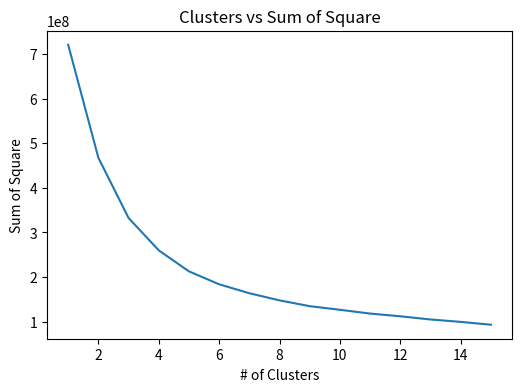

In [97]:
plt.figure(figsize = (6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [98]:
# 3개

In [99]:
x_dff['cluster'].value_counts()

1    1063
2     656
3      17
Name: cluster, dtype: int64

In [100]:
df.head()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,디스크단면적,디스크위치,척추이동척도,척추전방위증,최근입원기간,누적입원기간,count,new_연령,New_신장,BMI
0,10.5,2,44.0,0.0,0,0,0,0,0,0,...,2155.3,4,Middle,0,1,30,1,중년,1.74,24.772097
1,46.7,3,21.0,1.0,0,0,0,0,0,0,...,2143.1,4,Middle,0,3,30,1,청년,1.72,23.661439
2,30.1,3,13.0,0.0,0,0,0,0,0,0,...,1868.7,4,Down,0,0,30,1,청년,1.77,21.705129
3,45.4,3,0.0,0.0,0,0,0,0,0,0,...,1851.2,5,Middle,0,3,30,1,청년,1.72,23.661439
4,52.2,1,31.0,0.0,1,0,1,0,0,0,...,2419.1,2,Up,0,1,60,1,장년,1.66,27.943098


In [101]:
final_df = pd.concat([df , x_dff['cluster']], axis = 1)


In [39]:
final_df.to_csv('final_data.csv',index = False)